<span style="color:blue;"> <span style="font-size:30px;">__OPM Empty Room Recording Data Analysis__. </span> 

### Import necessary libraries and modules

In [1]:
#Import necessary libraries and modules

import mne
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import array

In [4]:
# List contents of the directory
directory_path = '/home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings'
files = os.listdir(directory_path)
file_name='Rec3.fif'
data_path=os.path.join(directory_path,file_name)
# Check if the specific file exists
file_exists = os.path.isfile(data_path)
print(f"File exists: {file_exists}")

File exists: True


In [5]:
#Data Loading

raw = mne.io.read_raw_fif(data_path, preload=True)


Opening raw data file /home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec3.fif...


/tmp/ipykernel_7887/2379556348.py:3: RuntimeWarning: This filename (/home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


Isotrak not found
    Range : 0 ... 1003199 =      0.000 ...   200.640 secs
Ready.
Reading 0 ... 1003199  =      0.000 ...   200.640 secs...


In [6]:
# Detailed information about the data

print(raw.info)

<Info | 16 non-empty values
 bads: []
 ch_names: s1_bz, L209_bz-s65, s2_bz, L207_bz-s66, R204_bz-s3, L205_bz-s67, ...
 chs: 72 Magnetometers, 1 Stimulus
 custom_ref_applied: False
 description: {"chassis":{"version":"0.7.7- ...
 experimenter: AR
 file_id: 4 items (dict)
 gantry_angle: 0.0
 highpass: 0.0 Hz
 line_freq: 0.0
 lowpass: 500.0 Hz
 meas_date: 2024-08-29 10:41:49 UTC
 meas_id: 4 items (dict)
 nchan: 73
 proj_id: 1 item (ndarray)
 proj_name: Rec2
 projs: []
 sfreq: 5000.0 Hz
 xplotter_layout: None
>


In [ ]:
# Computing Power-Spectral Density
# Change the fmin and fmax frequency as per the requirement
n_fft = 2000
raw_PSD = raw.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))


In [ ]:
# Plot the PSD

%matplotlib inline  
raw_PSD.plot(picks='mag'); # As the OPM does not have any Gradiometeres

In [ ]:
# Avergae power computation

raw.plot_psd(fmax=100,picks='mag',average=True)

In [ ]:
# Plot the raw data (as per required time window and channels for inspection)
%matplotlib inline  
raw.plot(duration=10, n_channels=10, scalings='auto')

In [ ]:
# PSD based ranking and plot of channels 

fmin = 0.1  # minimum frequency in Hz
fmax = 100  # maximum frequency in Hz

# Compute the PSD for all channels
psds = raw.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))

# Extract the PSD values and frequencies
psd_values = psds.get_data()  
freqs = psds.freqs  


psd_values = np.array(psd_values)  
freqs = np.array(freqs) 


average_power = np.mean(psd_values, axis=1)


channel_names = raw.info['ch_names']



channel_data = list(zip(channel_names, average_power, psd_values))
channel_data.sort(key=lambda x: x[1], reverse=True)

# Plot the PSD for each channel, sorted by average power
for rank, (channel, avg_power, psd) in enumerate(channel_data, 1):
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd), label=f'Rank {rank}: {channel}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title(f'PSD - {channel} ')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Sort the DataFrame by Average Power in descending order
df_sorted = df.sort_values(by='Average Power', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(df_sorted)

##  New OPM Data Analysis taken on 06 August 2024

In [ ]:
# List contents of the directory
directory_path = '/home/rakshita/sub-Emptyroom'
files = os.listdir(directory_path)
data_path = '/home/rakshita/sub-Emptyroom/Emptyroom06082024.fif'
# Check if the specific file exists
file_exists = os.path.isfile(data_path)
print(f"File exists: {file_exists}")

In [ ]:
raw = mne.io.read_raw_fif(data_path, preload=True)

In [ ]:
print(raw.info)

## Simple script to downsample the OPM data and save it in the same directory

In [ ]:
## Downsampling the original file with the desired downsampling frequency.

rawfile='/home/rakshita/sub-Emptyroom/Emptyroom06082024.fif'
raw = mne.io.read_raw_fif(rawfile, preload=True)

print(f'Original sampling frequency: {raw.info["sfreq"]} Hz')

# Desired Downsampling Frequency
d_sample=1000
raw.resample(d_sample, npad='auto')

# Print new sampling frequency
print(f'New sampling frequency: {raw.info["sfreq"]} Hz')

output_file = rawfile.replace('.fif', '_d_sample1000.fif')

# Save the downsampled data to a new FIF file
raw.save(output_file, overwrite=True)

print(f'Downsampled file saved as: {output_file}')


In [ ]:
## Reading the newly generated downsampled fif file.

new_file = '/home/rakshita/sub-Emptyroom/Emptyroom06082024_d_sample1000.fif'
raw_new=mne.io.read_raw_fif(new_file, preload=True)

## Deatailed information of the downsampled OPM Data

In [ ]:
## Print the detailed information of new fif file

print(raw_new.info)

In [ ]:
# Computing Power-Spectral Density
# Change the fmin and fmax frequency as per the requirement
n_fft = 10000
raw_PSD = raw.compute_psd(method="welch", fmin=1, fmax=120, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))
new_PSD = raw_new.compute_psd(method="welch", fmin=1, fmax=120, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))

## Compairing Original and Downsampled version

In [ ]:
# Compare PSD between original and downsampled version
fig1 = raw_PSD.plot(picks='mag')
fig2 = new_PSD.plot(picks='mag')


In [ ]:
#### create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the original PSD on the first subplot
for line in fig1.axes[0].lines:
    ax1.plot(line.get_xdata(), line.get_ydata())
ax1.set_xlim(0, 60)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power Spectral Density (dB)')
ax1.set_title('Original PSD (5000 Hz)')
ax1.legend()

# Plot the downsampled PSD on the second subplot
for line in fig2.axes[0].lines:
    ax2.plot(line.get_xdata(), line.get_ydata())
ax2.set_xlim(0, 60)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power Spectral Density (dB)')
ax2.set_title('Downsampled PSD (1000 Hz)')
ax2.legend()

#plt.tight_layout()
plt.show()


In [ ]:
data, times = raw_new[:]

In [ ]:
data.shape

In [ ]:
data1,times1=raw[:]

In [ ]:
data1.shape

In [ ]:
# Check original data dimensions
original_data, _ = raw[:]
original_n_samples = original_data.shape[1]
print(f'Original number of samples: {original_n_samples}')

# Desired Downsampling Frequency
d_sample = 1000
raw.resample(d_sample, npad='auto')

# Print new sampling frequency
print(f'New sampling frequency: {raw.info["sfreq"]} Hz')

# Check new data dimensions
new_data, _ = raw[:]
new_n_samples = new_data.shape[1]
print(f'New number of samples: {new_n_samples}')

# Resampling as suggested by Prof. Ole

In [ ]:
### Filtering and decimation
## Make sure Transition bandwidth is less than half of the upper cut-off.
current_sfreq = raw.info['sfreq']
desired_sfreq = 1000  # Hz
decim = np.round(current_sfreq / desired_sfreq).astype(int)
obtained_sfreq = current_sfreq / decim
lowpass_freq = obtained_sfreq / 4.

raw_filtered = raw.copy().filter(l_freq=None, h_freq=lowpass_freq)



## Comparsion of Sampling Strategies ( Decimation function vs Manual Decimation)

In [ ]:
# Get data from the MEG object
data = raw.get_data()
data_f=raw_filtered.get_data()
sfreq = raw.info['sfreq']
sfreq_f=raw_filtered.info['sfreq']
time = np.arange(data.shape[1]) / sfreq
    

In [ ]:
#decimated_data = np.zeros((data.shape[0], data.shape[1] // downsampling_factor))
ds_factor = 4
    
# Decimated sampling frequency
sfreq_new = sfreq / ds_factor
    
    # Decimated data storage
decimated_data = np.zeros((data.shape[0], data.shape[1] // ds_factor))
decimated_data_new = np.zeros((data_f.shape[0], (data_f.shape[1]-1) // ds_factor))   

In [ ]:
for i, channel_data in enumerate(data):
    # decimation using scipy's decimate function
    ydem = signal.decimate(channel_data, ds_factor)
    decimated_data[i, :] = ydem      
    # Create X axis variables
    t_new = np.arange(len(ydem)) / sfreq_new
        

In [ ]:
for i, channel_data in enumerate(data_f):
    # decimation using scipy's decimate function
    manual_decimation = channel_data[:-ds_factor:ds_factor]
    #np.append(manual_decimation, 0)
    decimated_data_new[i,:]=manual_decimation
    # Create X axis variables
    t_manual_decimation = np.arange(len(manual_decimation)) / sfreq_new

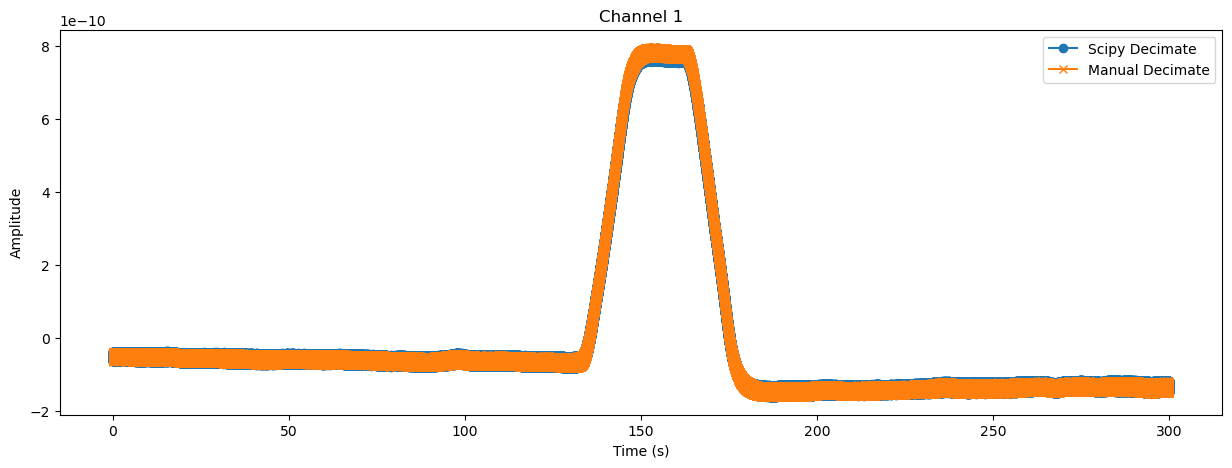

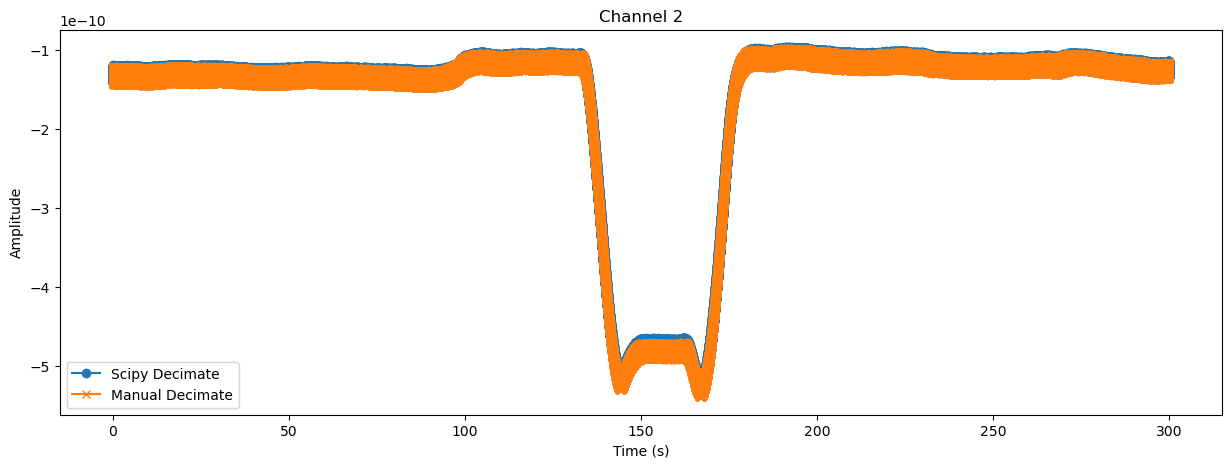

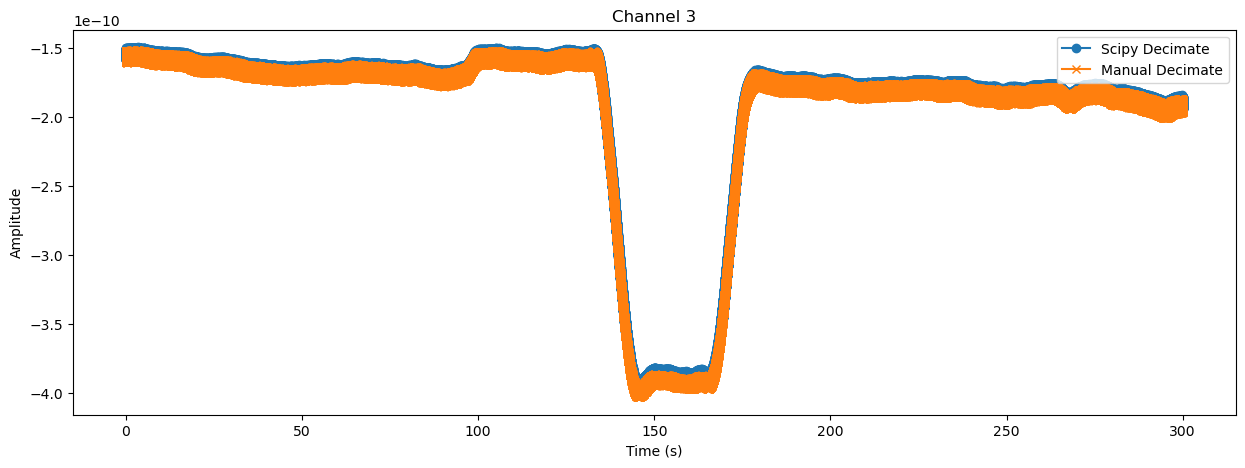

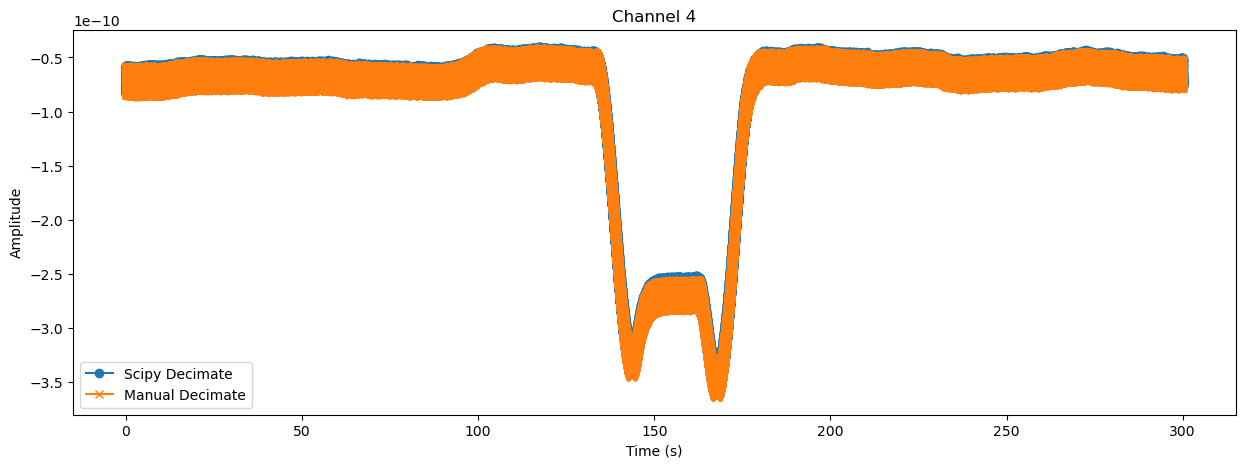

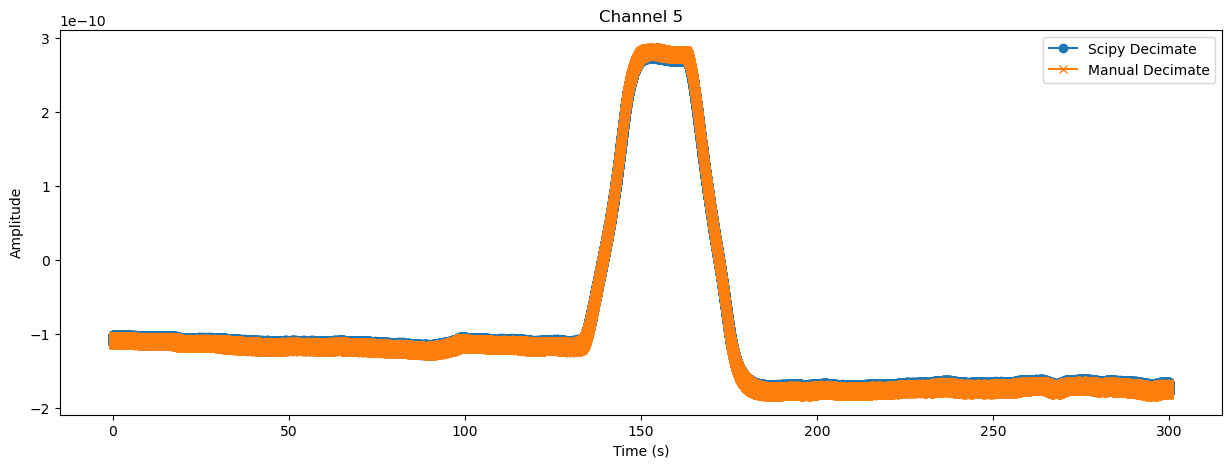

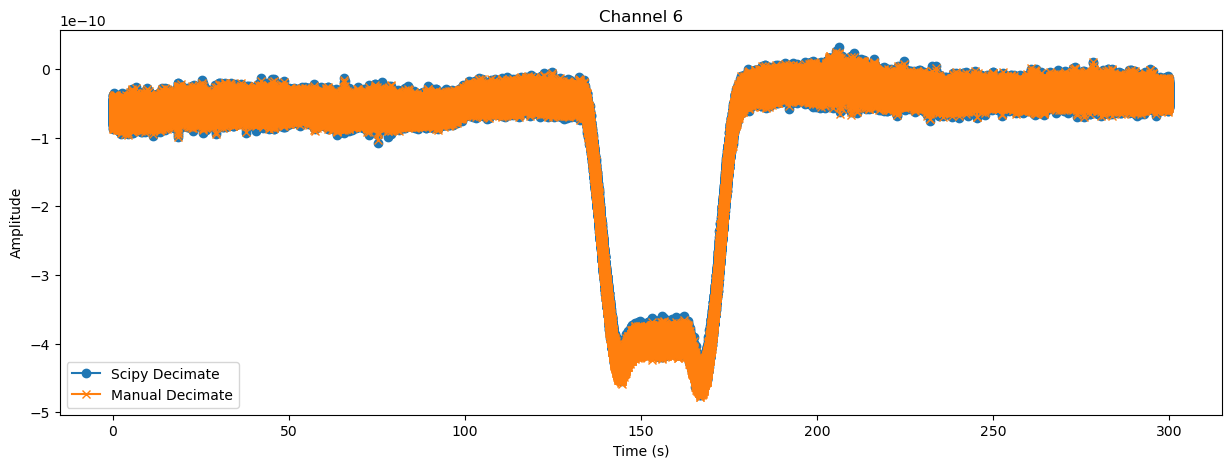

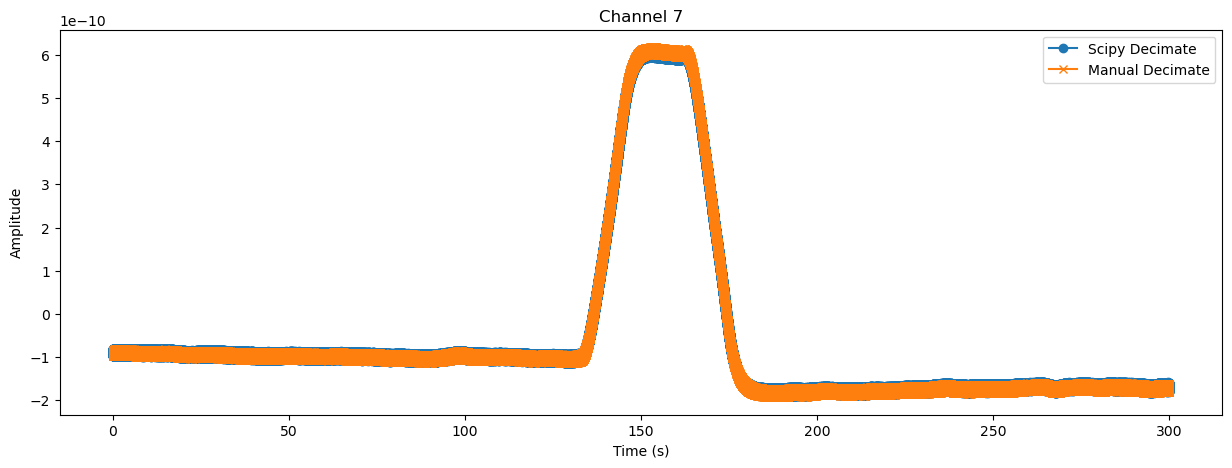

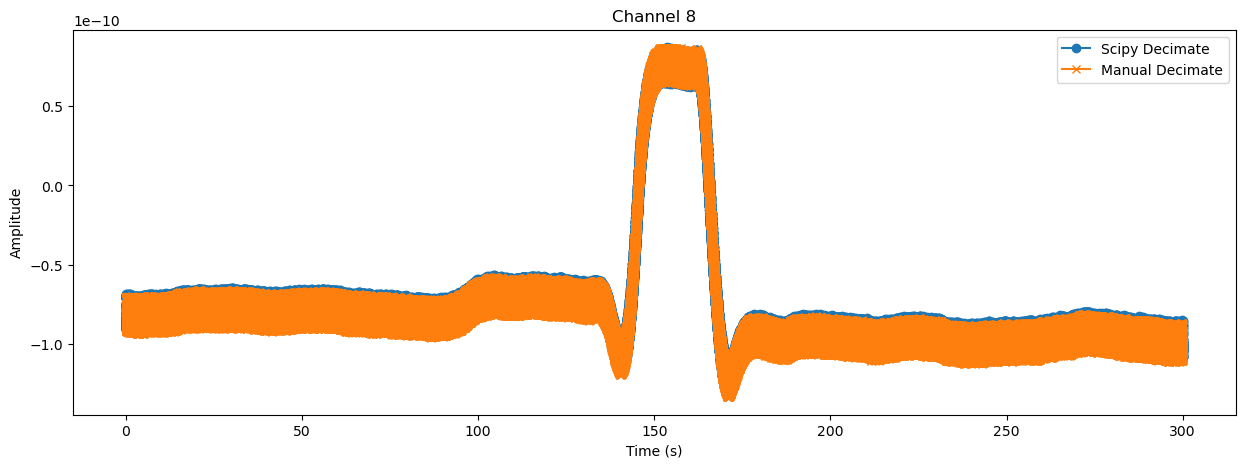

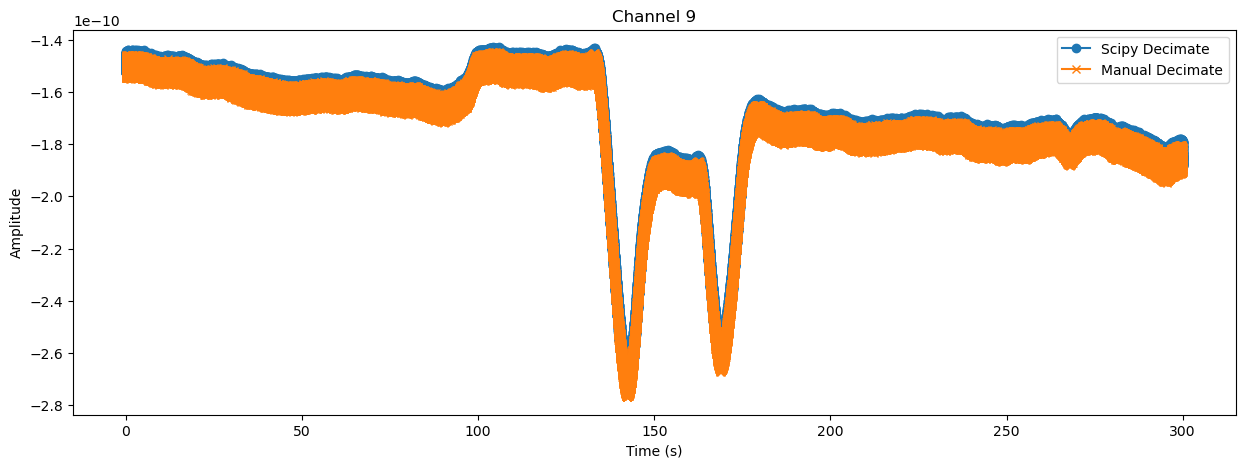

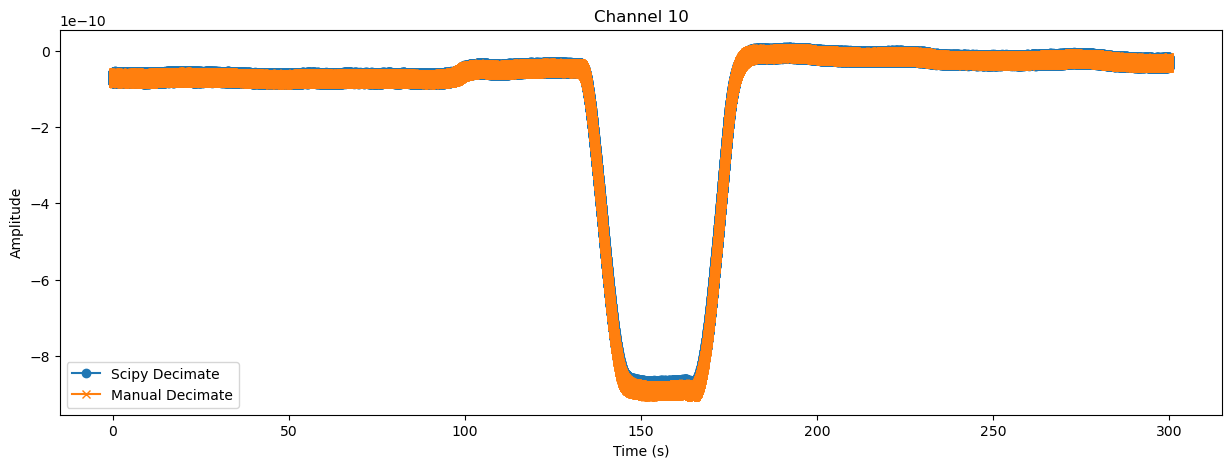

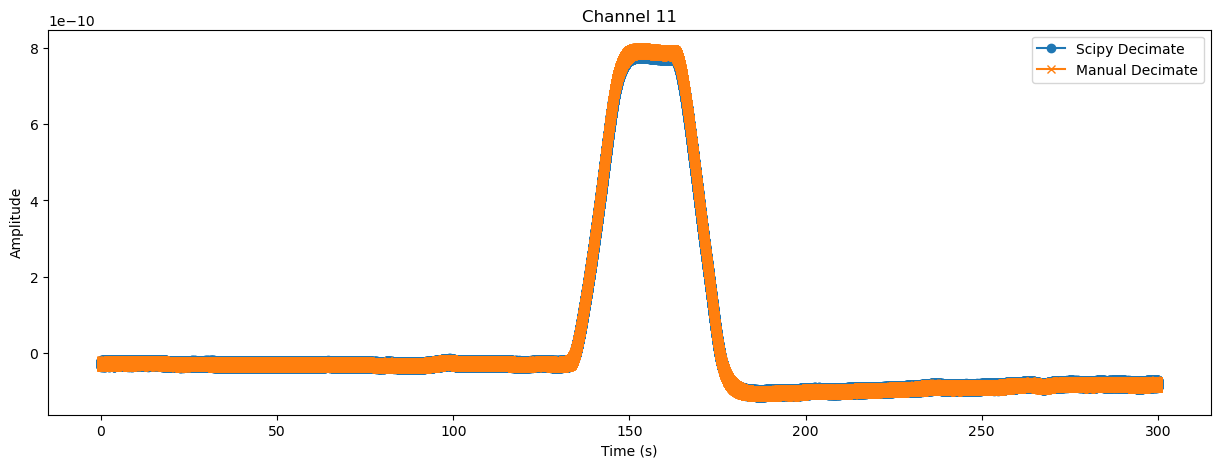

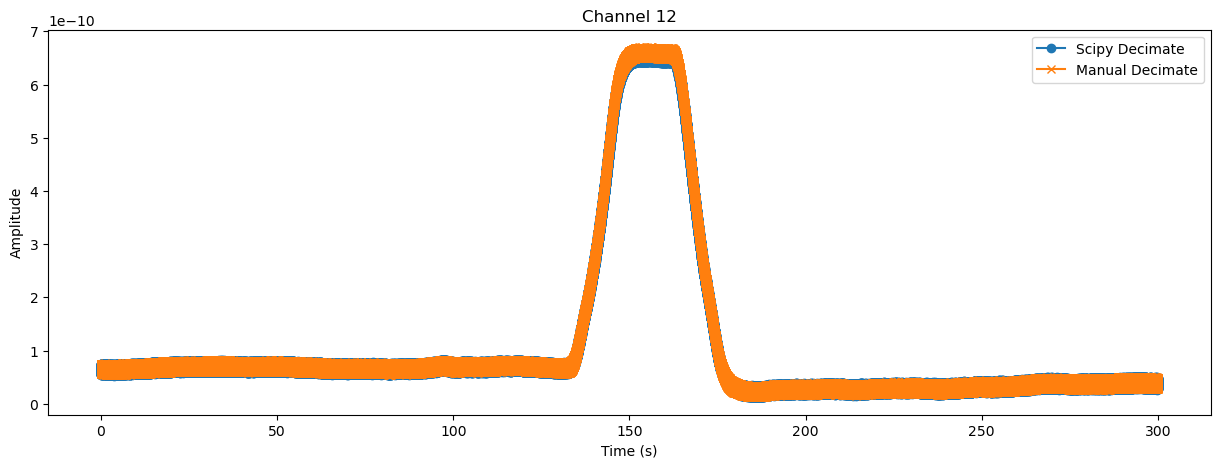

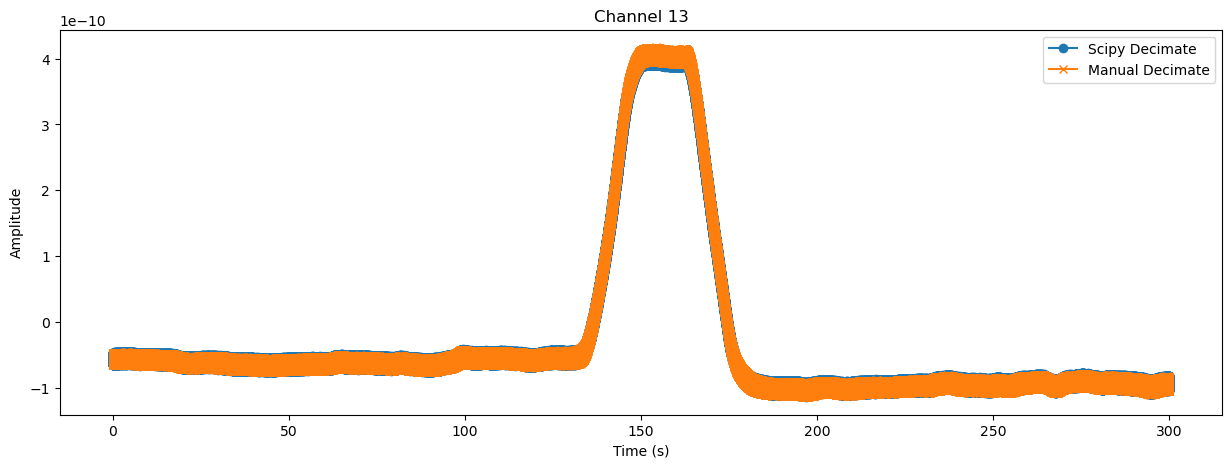

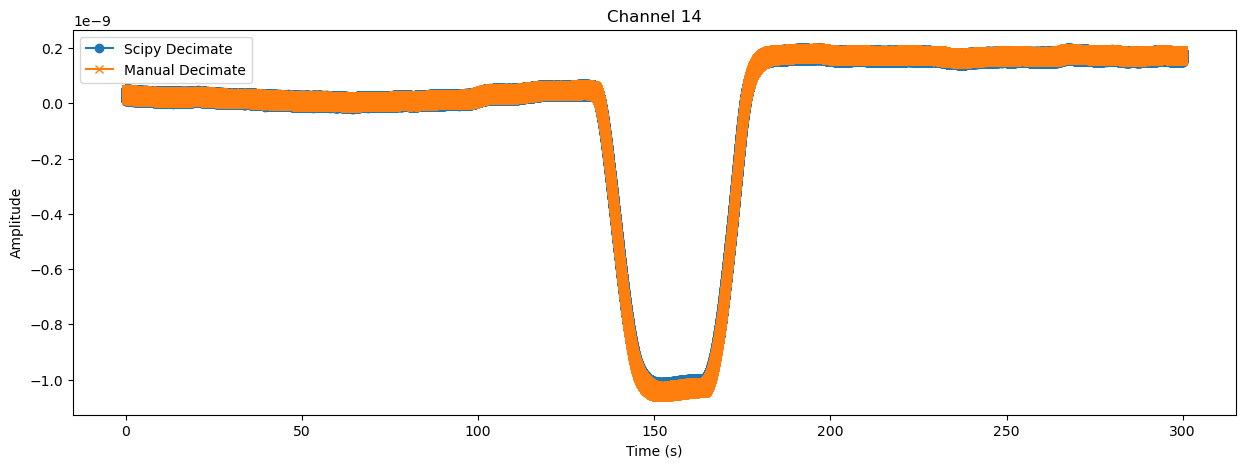

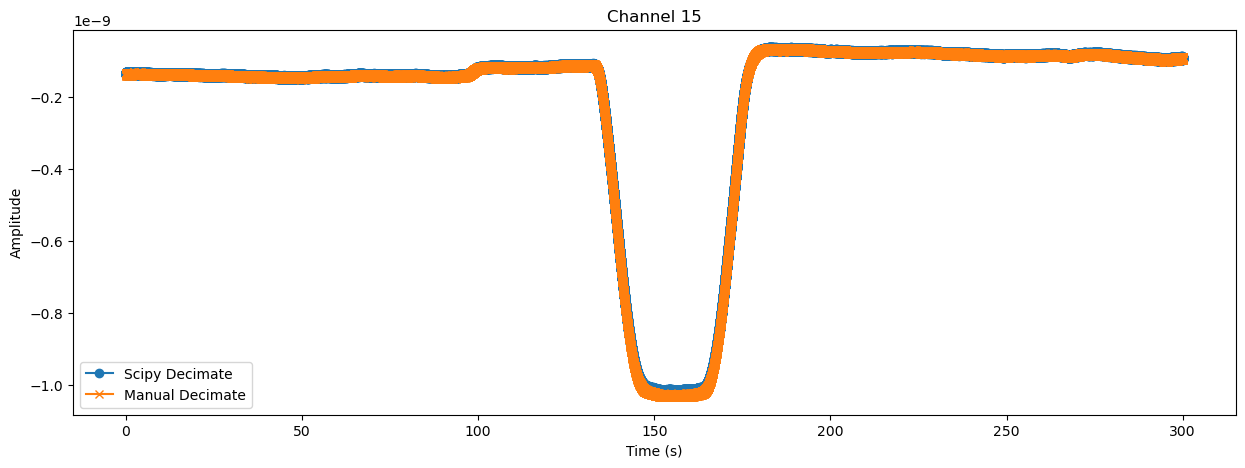

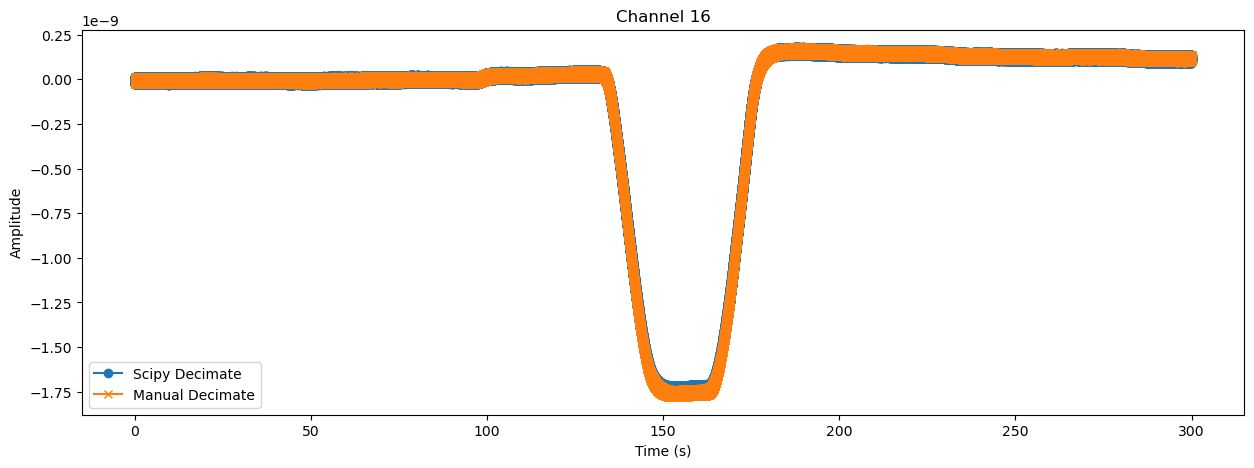

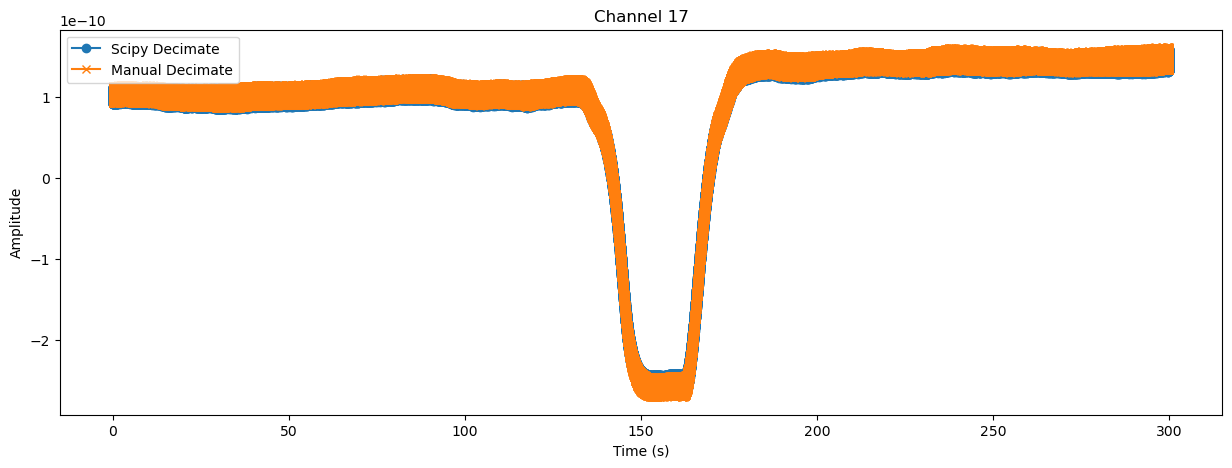

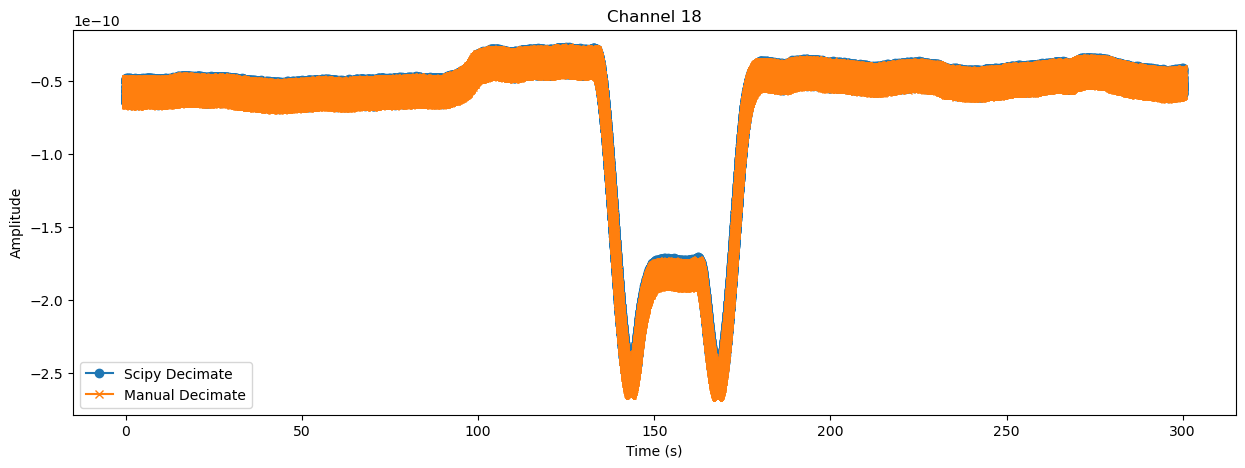

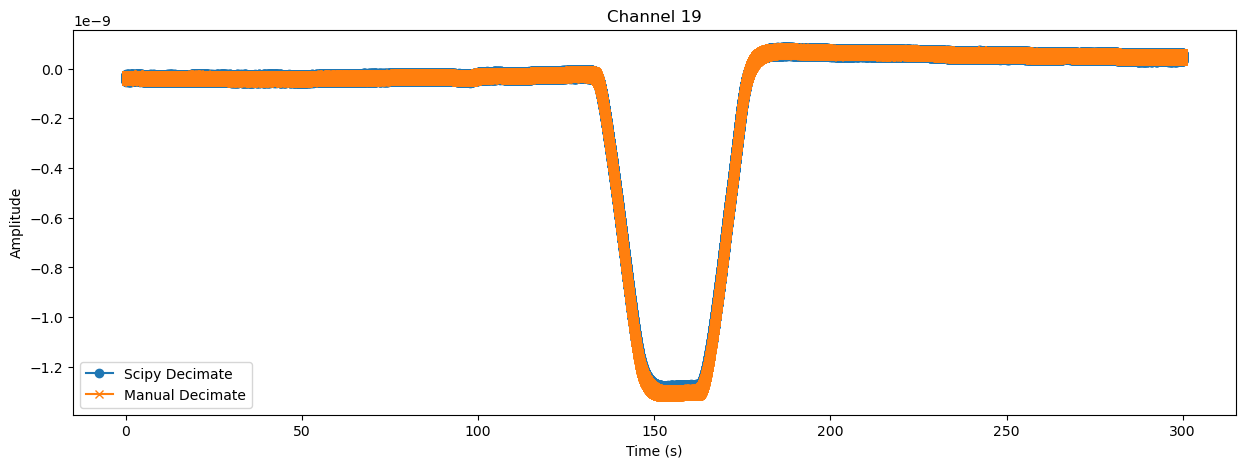

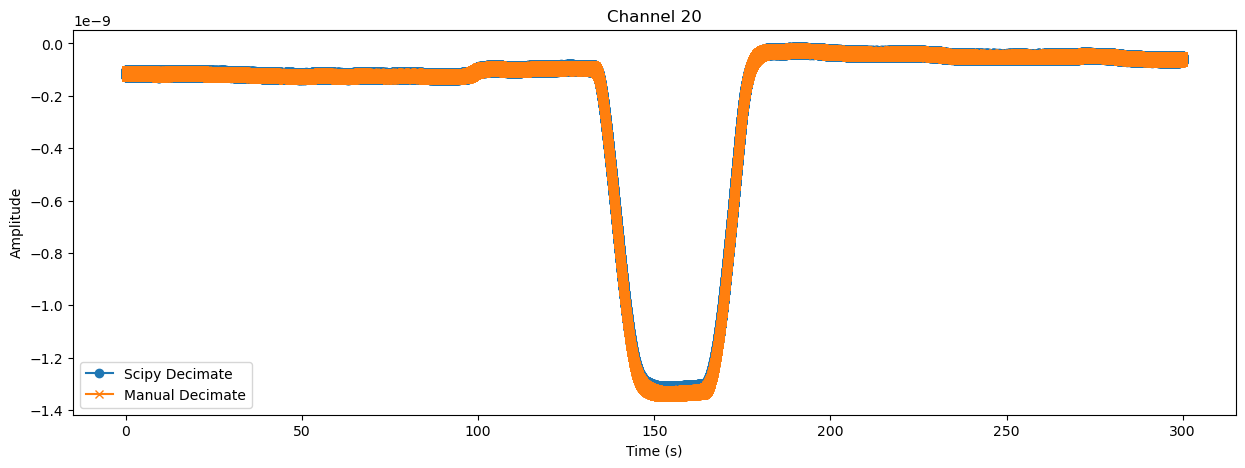

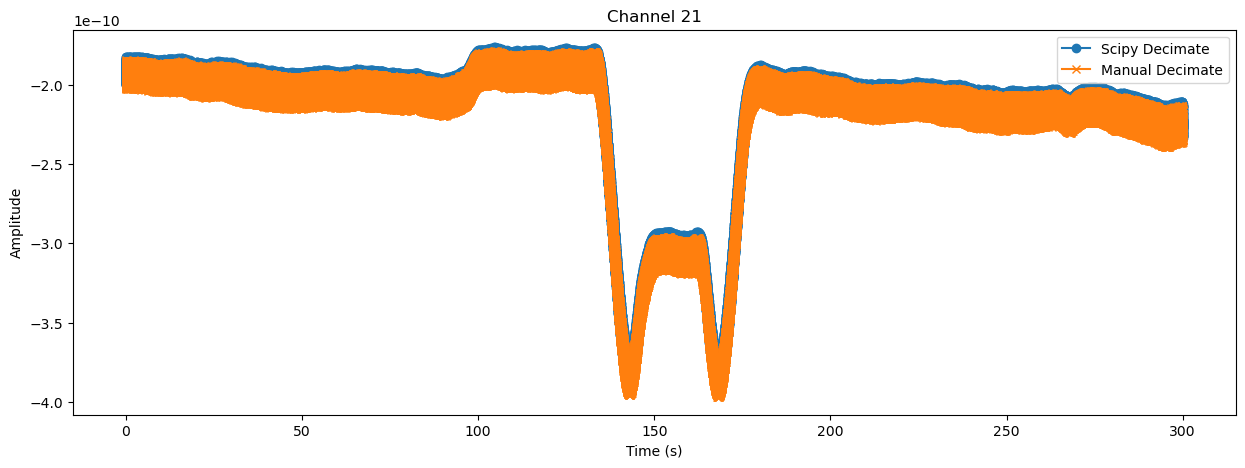

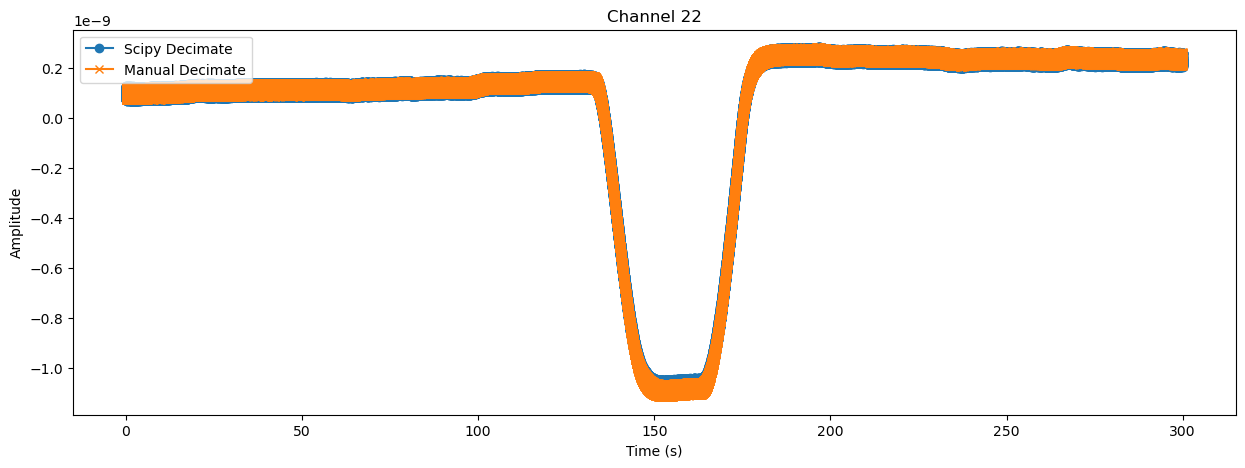

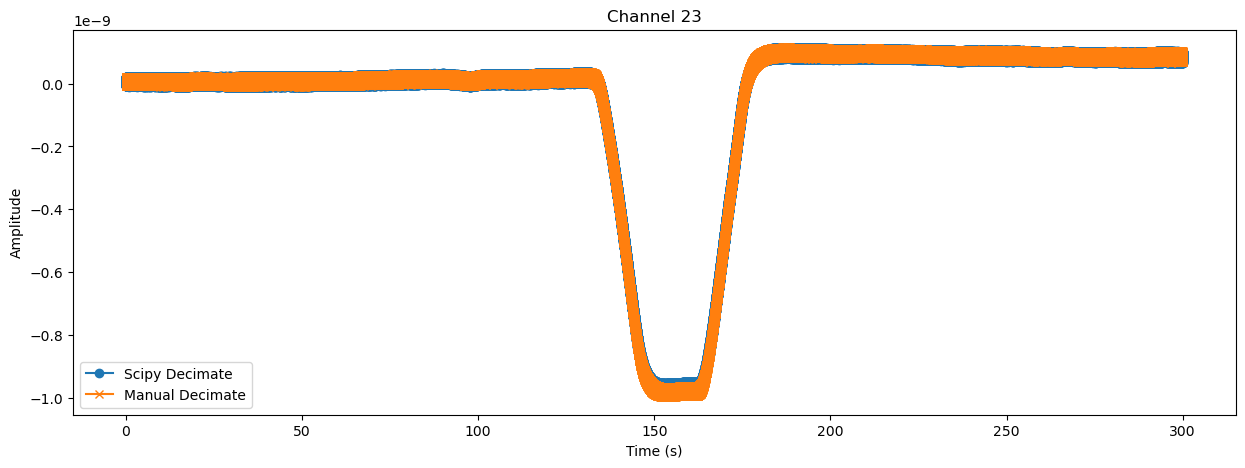

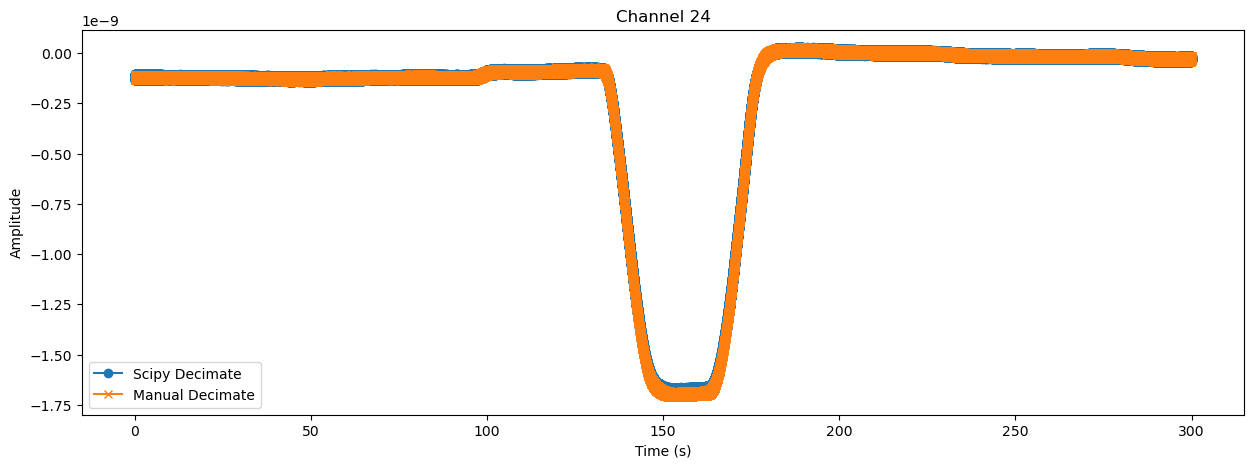

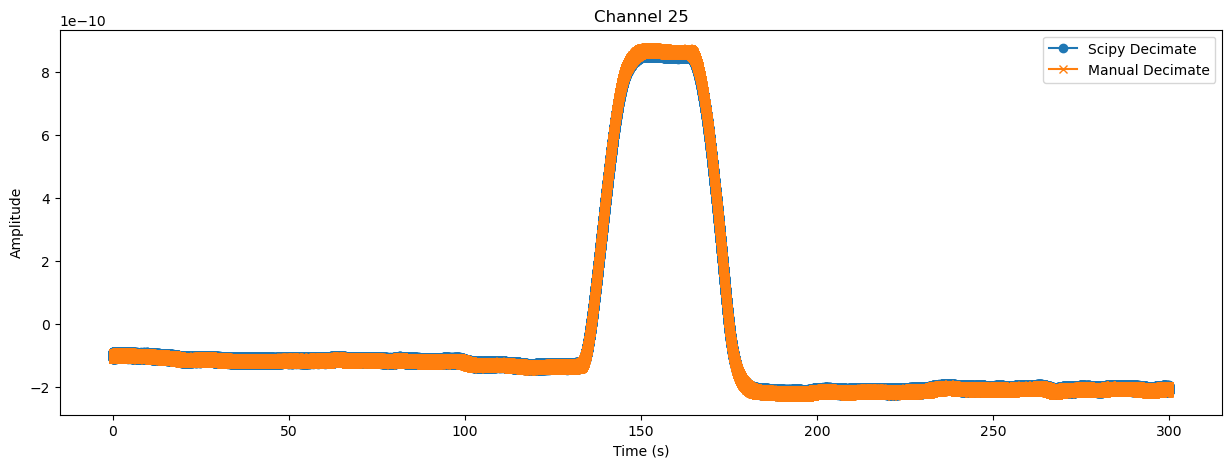

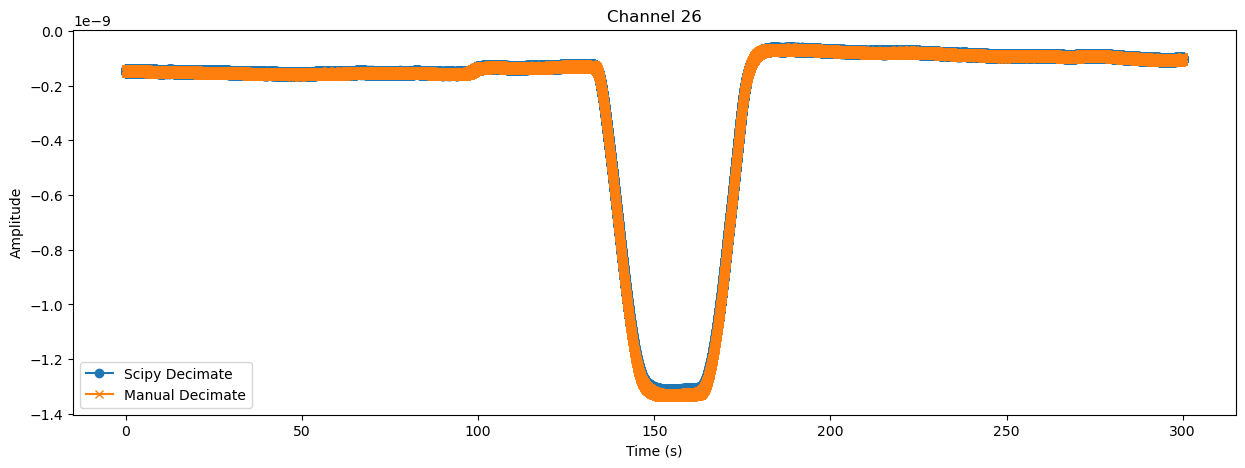

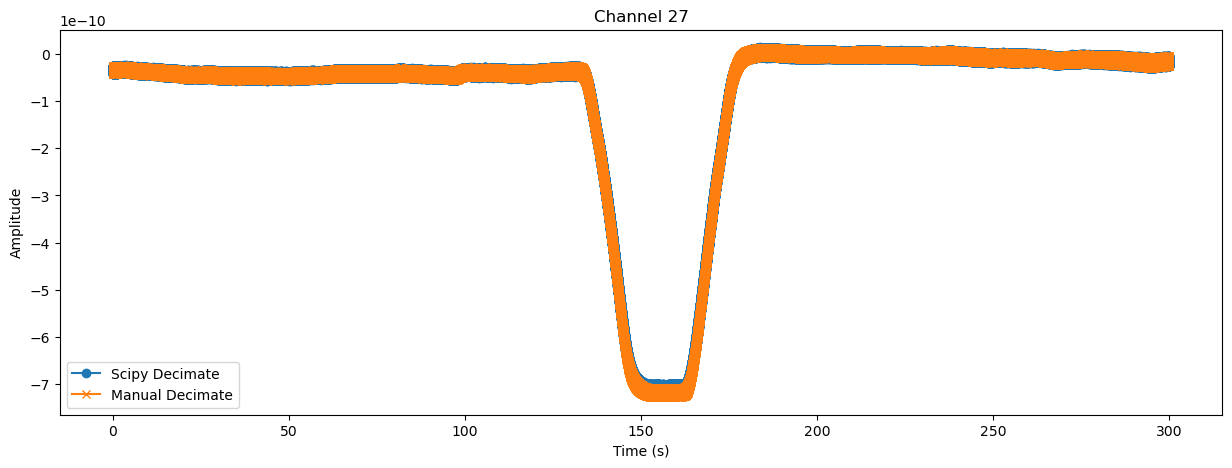

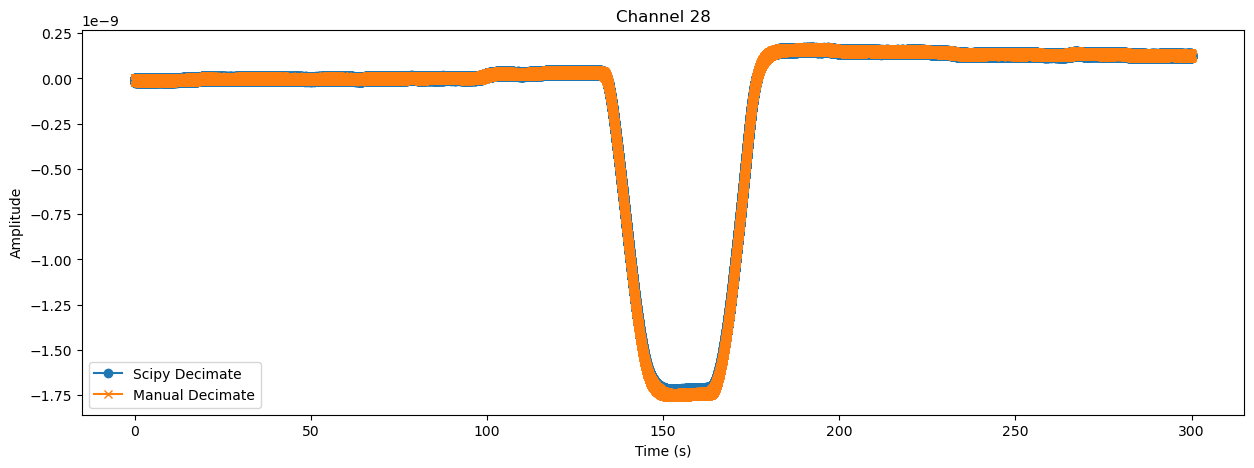

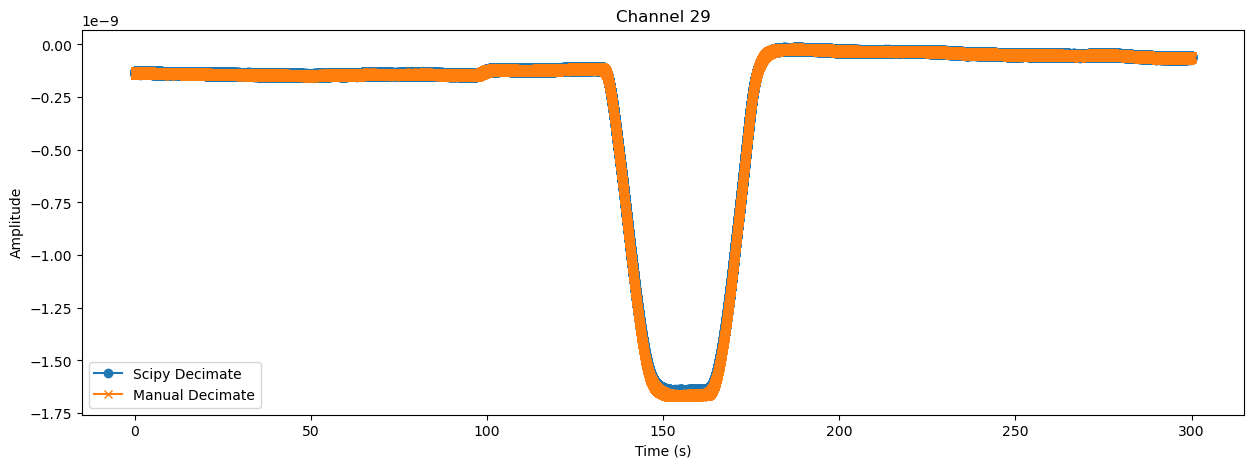

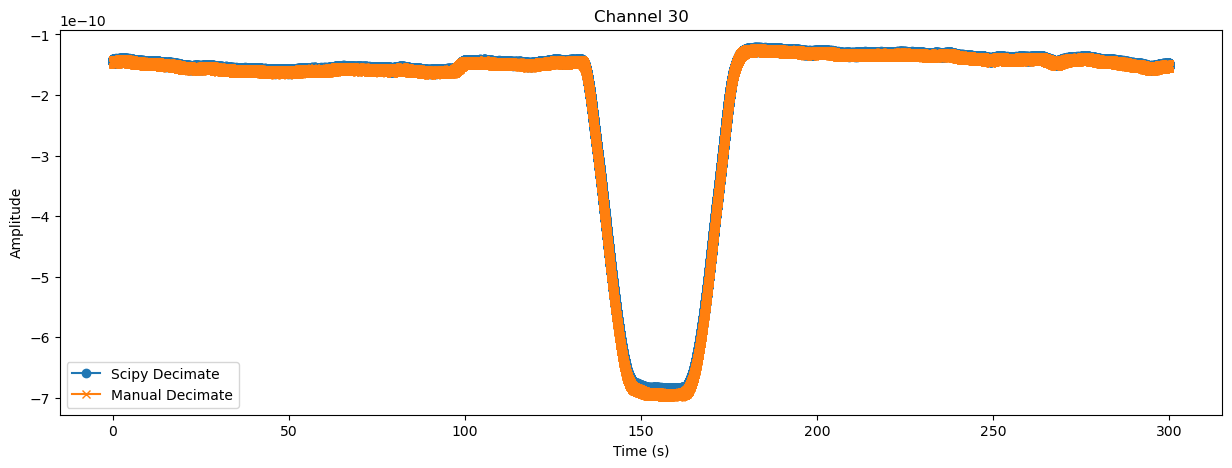

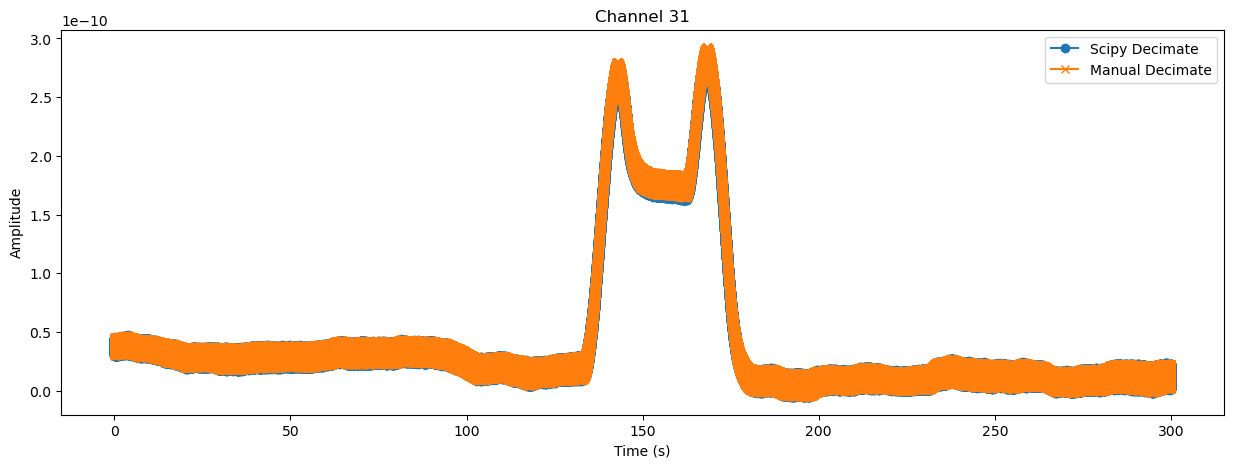

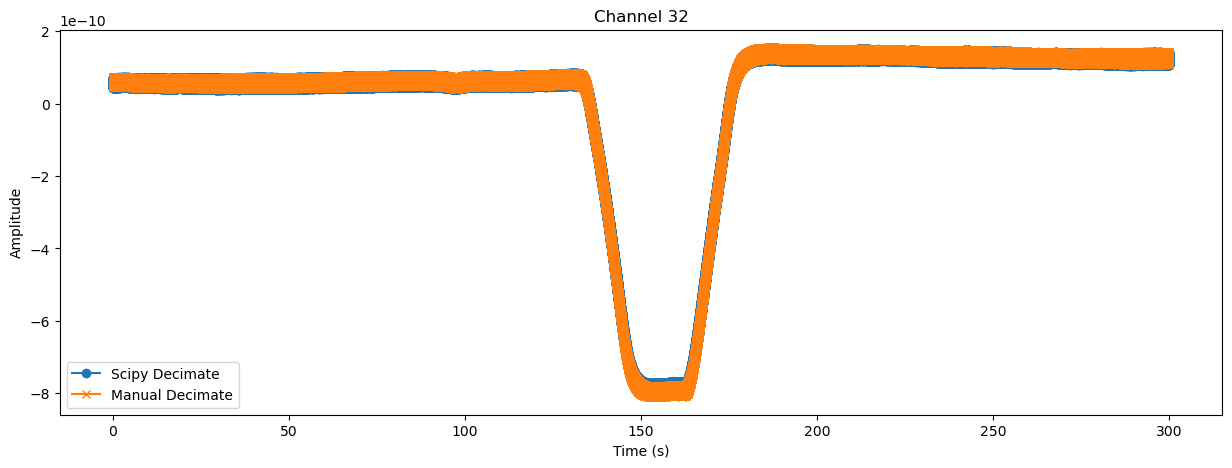

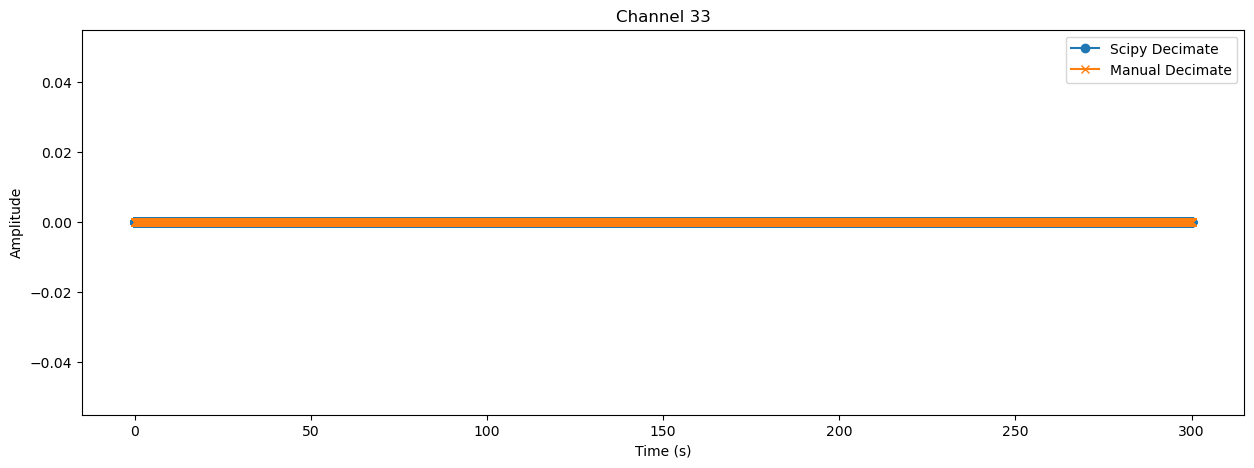

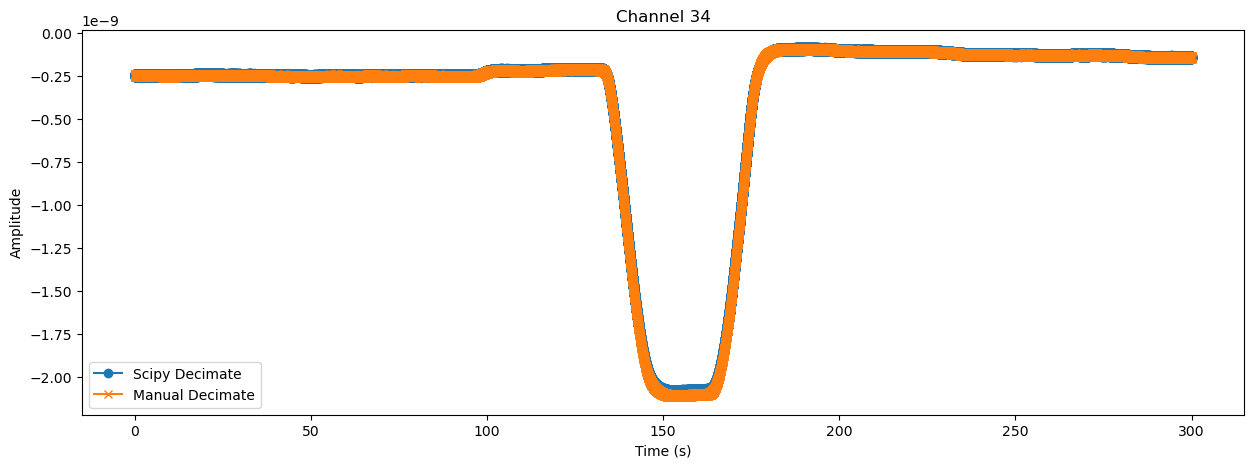

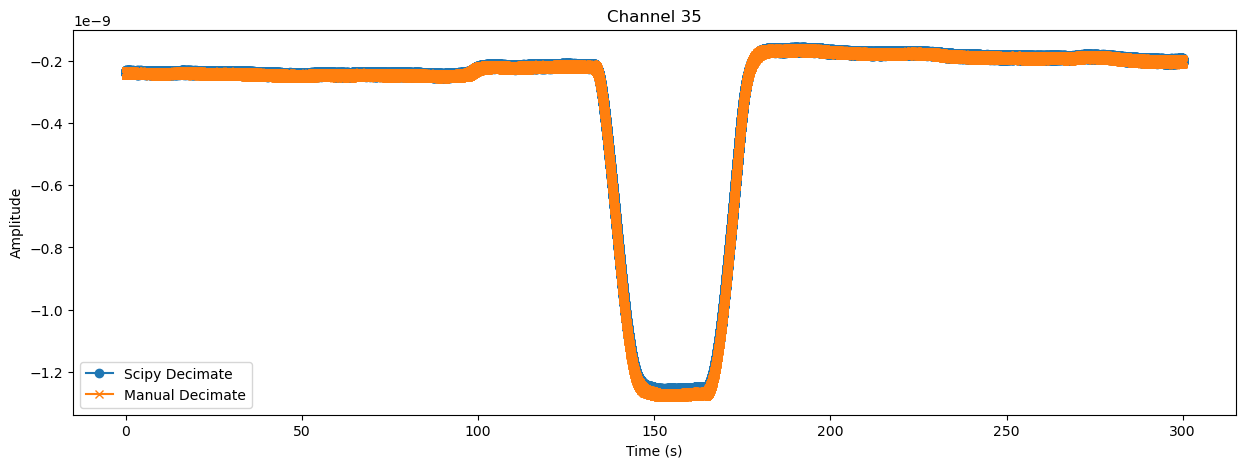

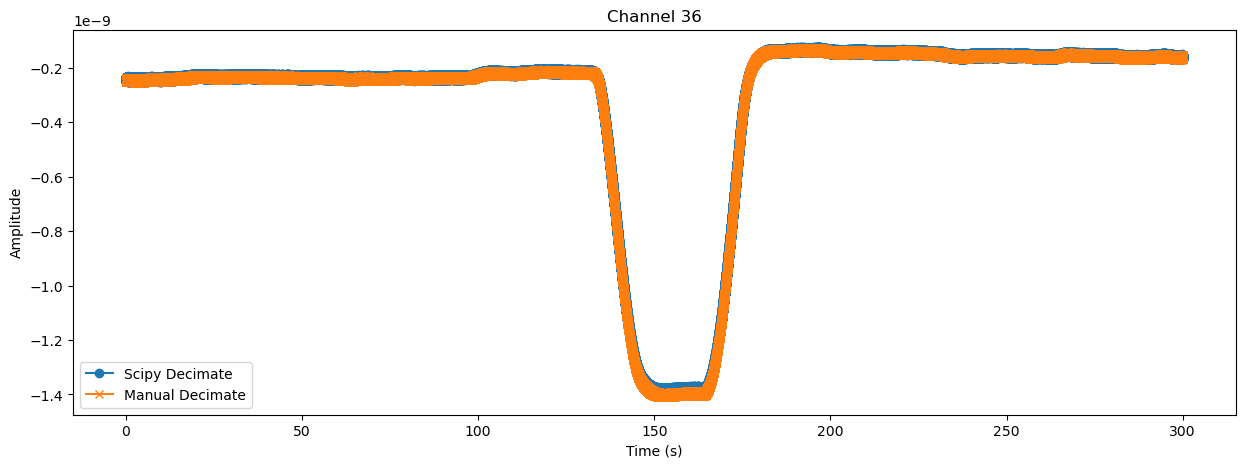

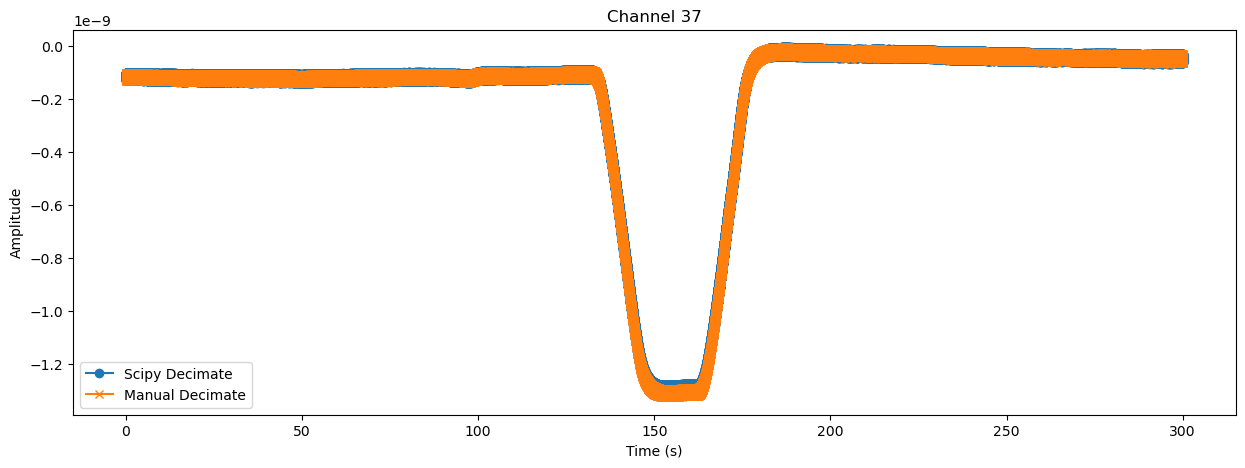

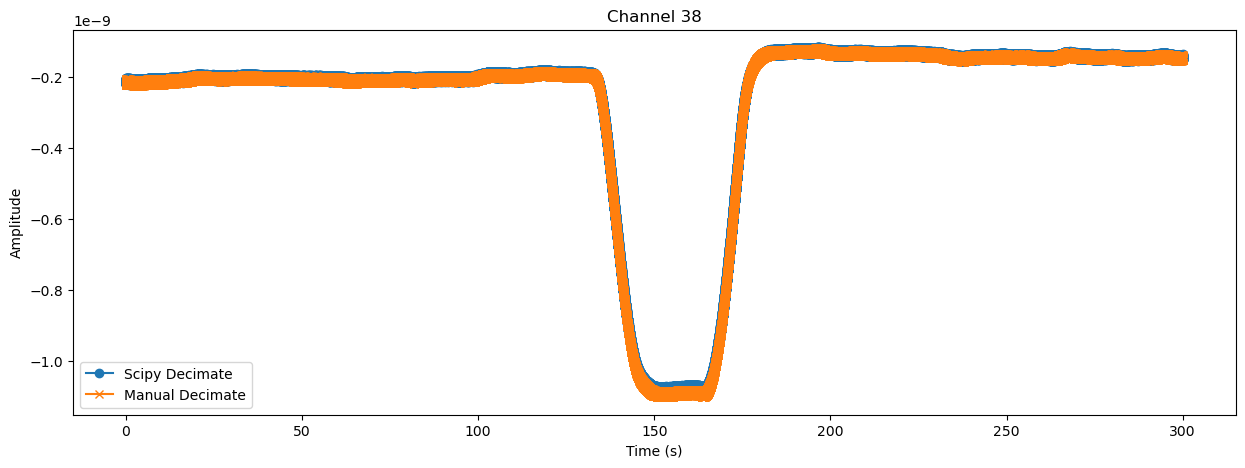

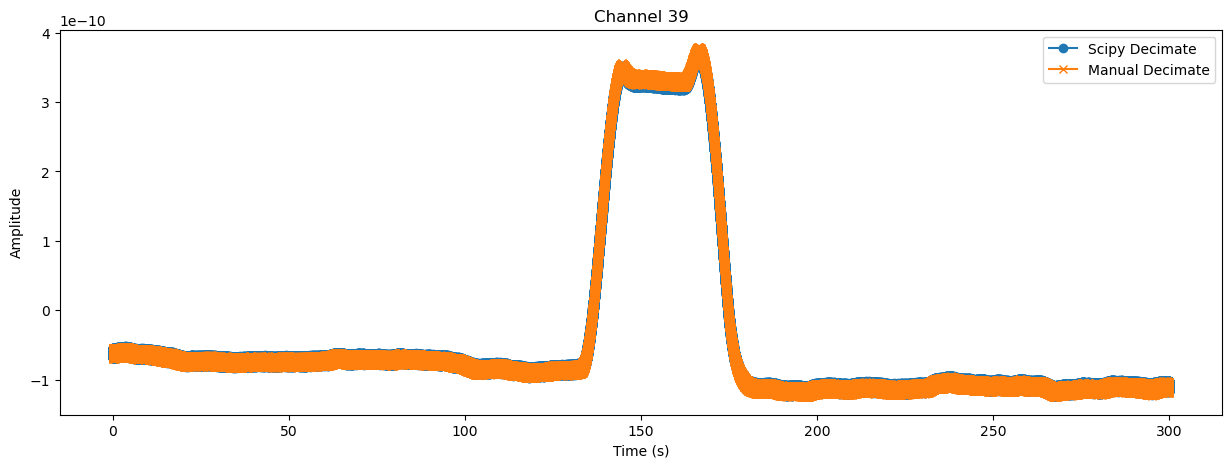

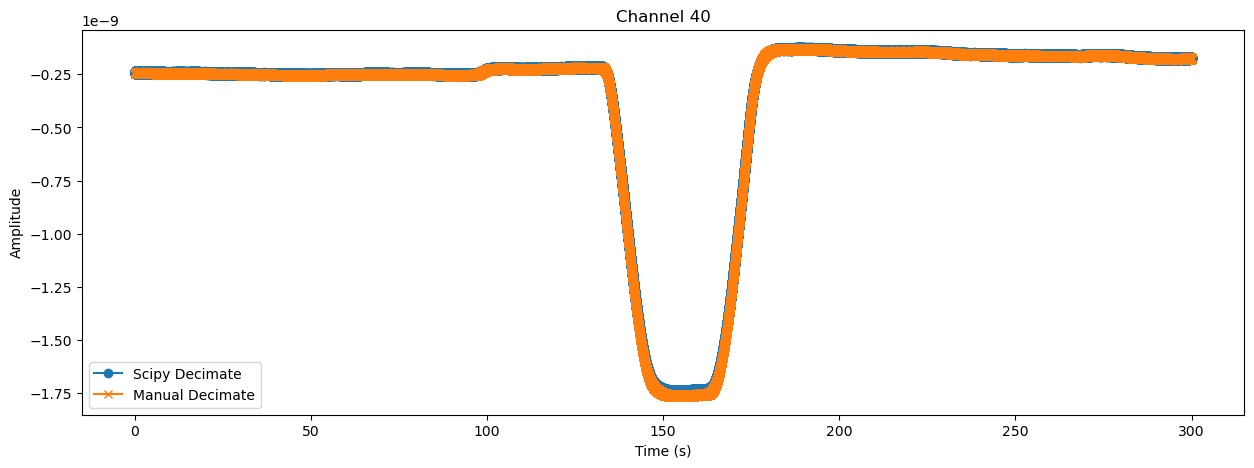

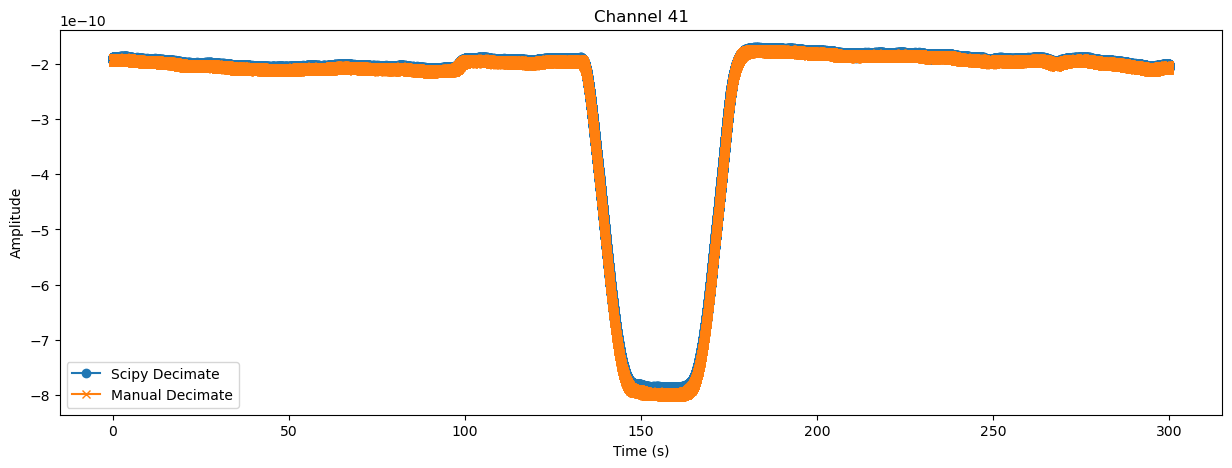

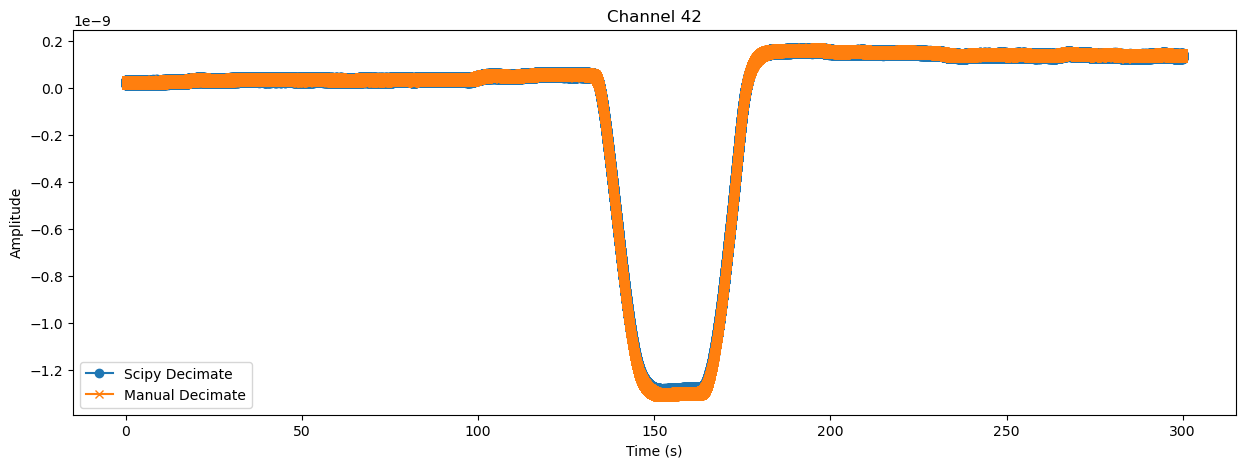

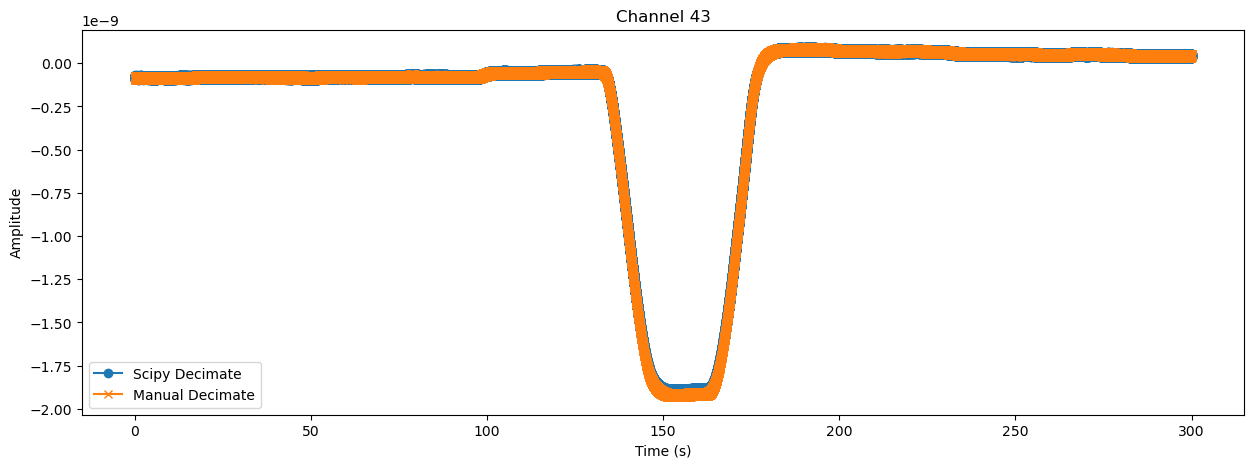

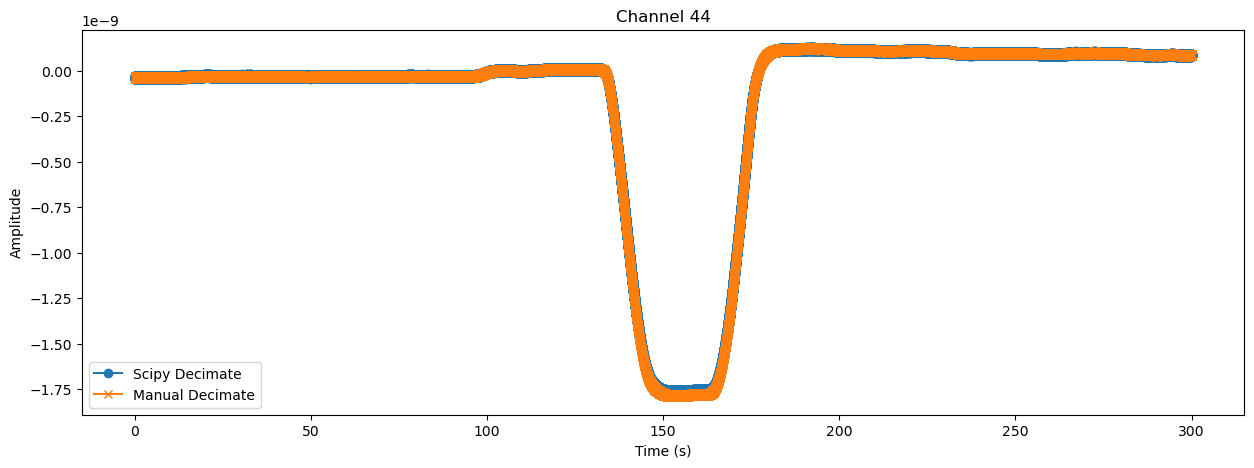

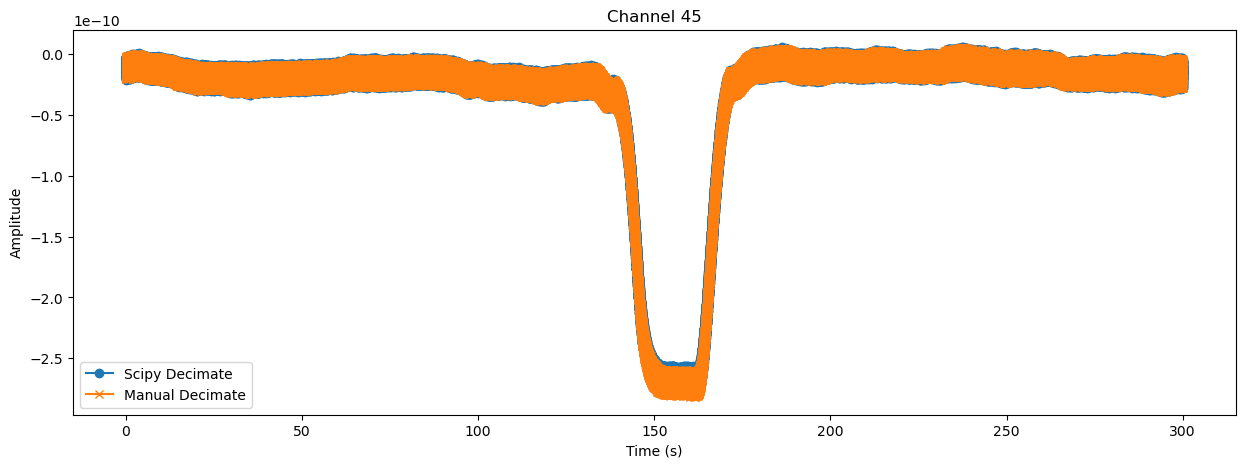

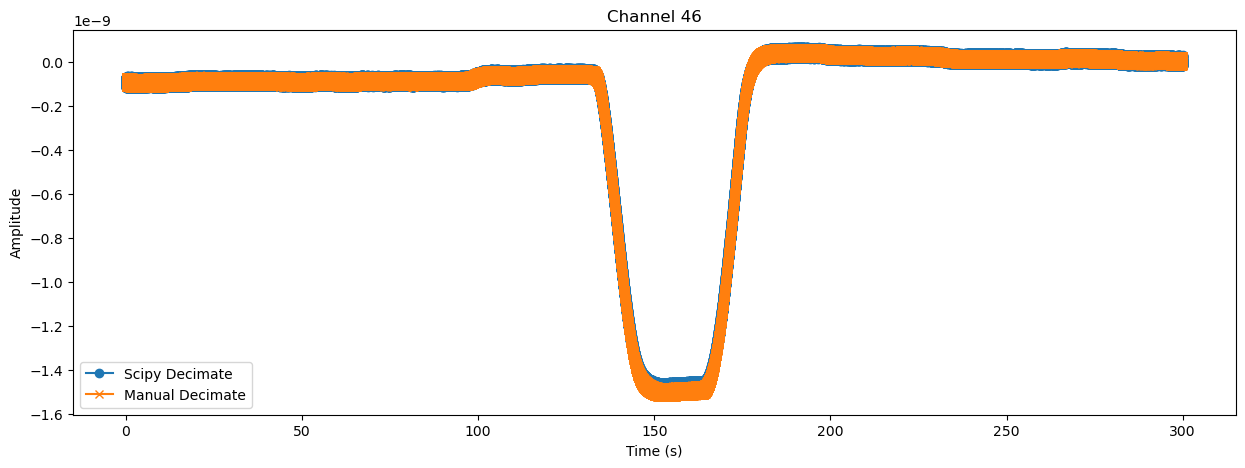

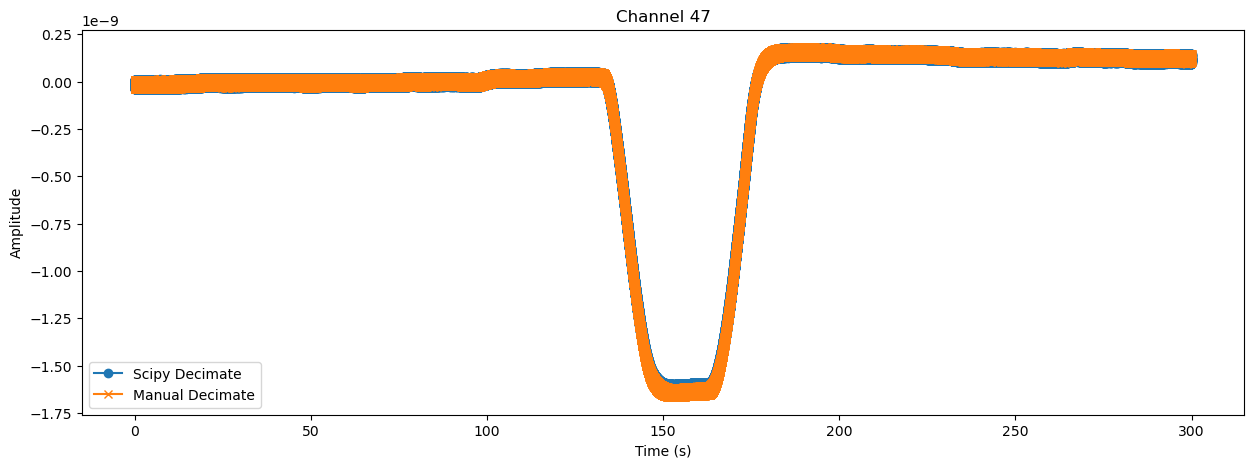

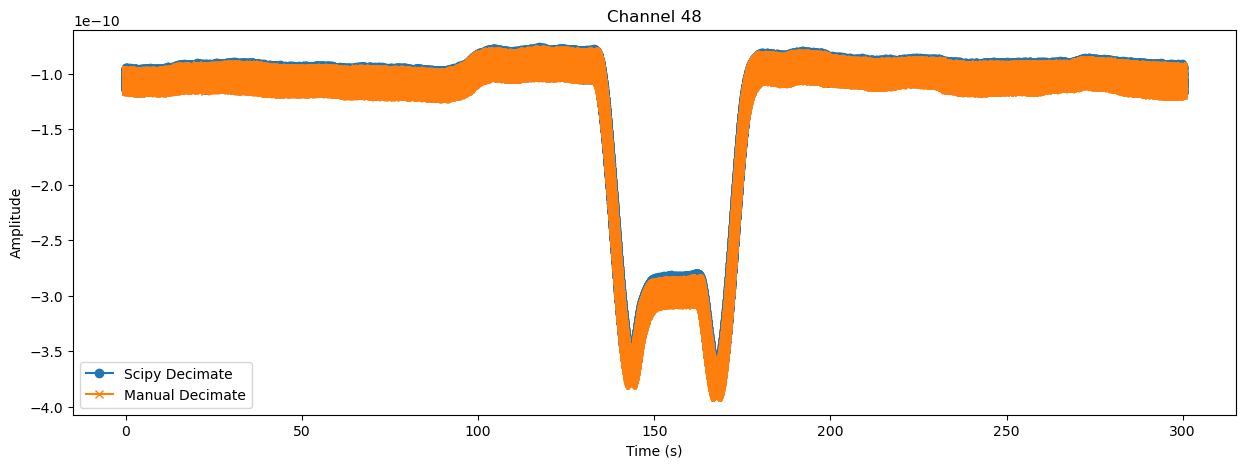

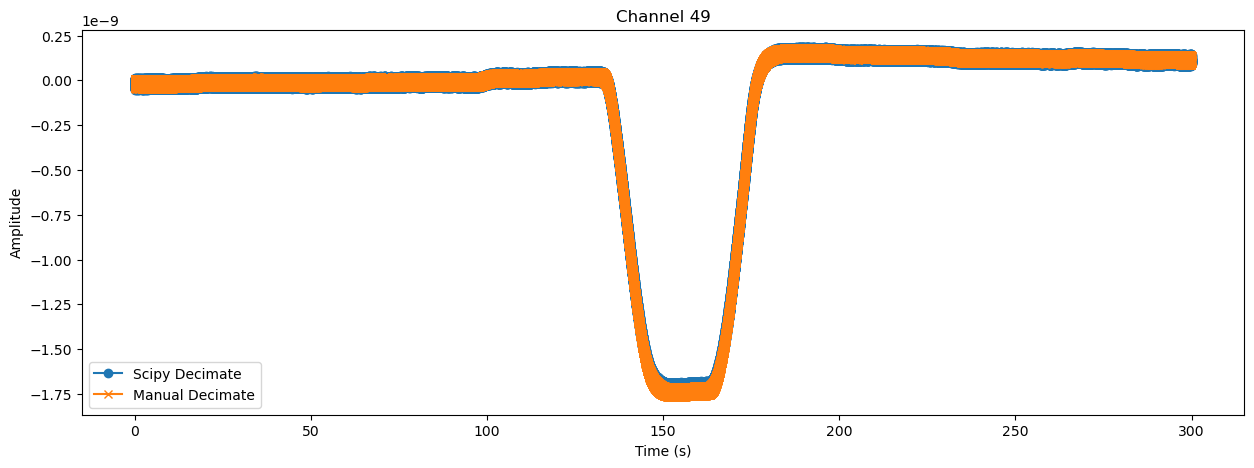

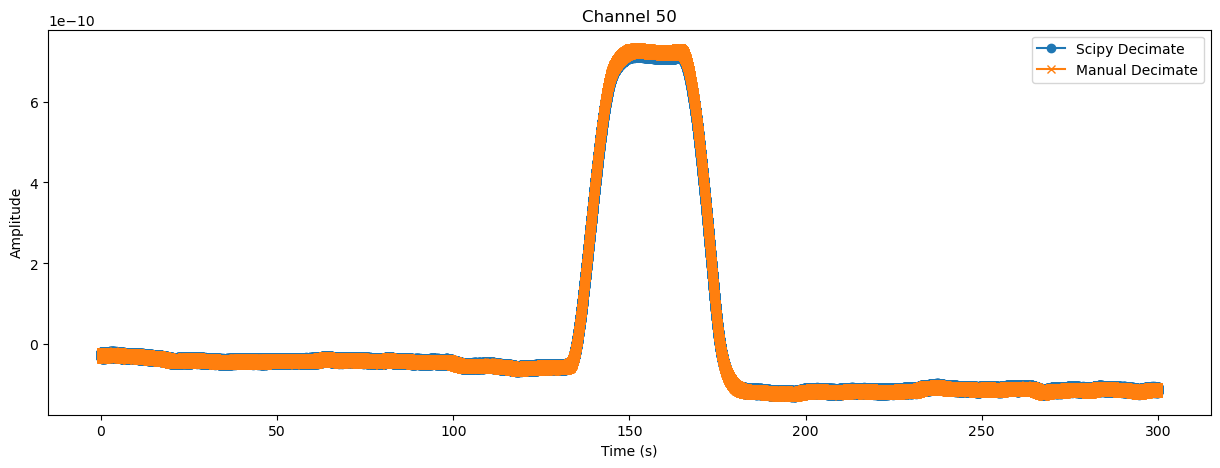

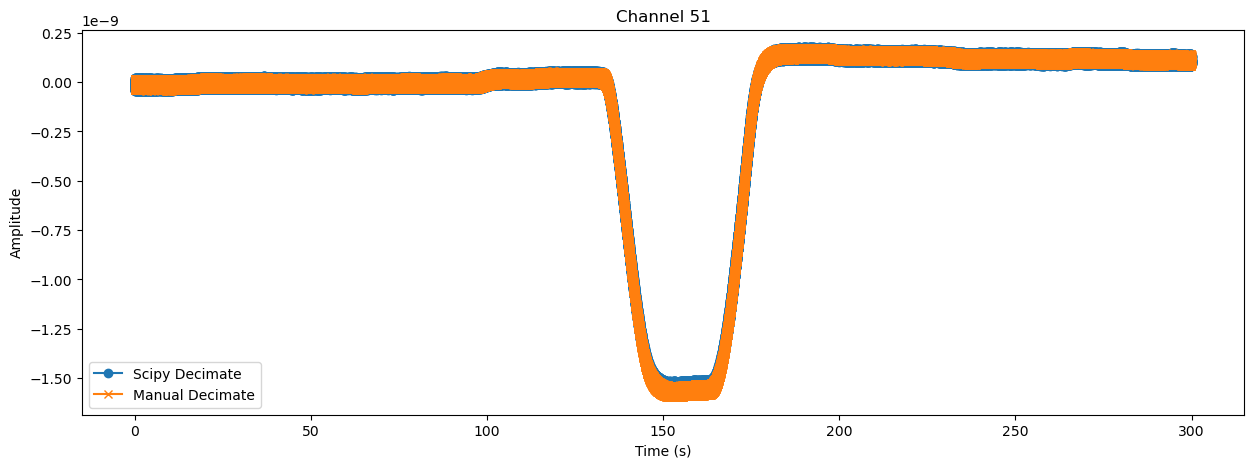

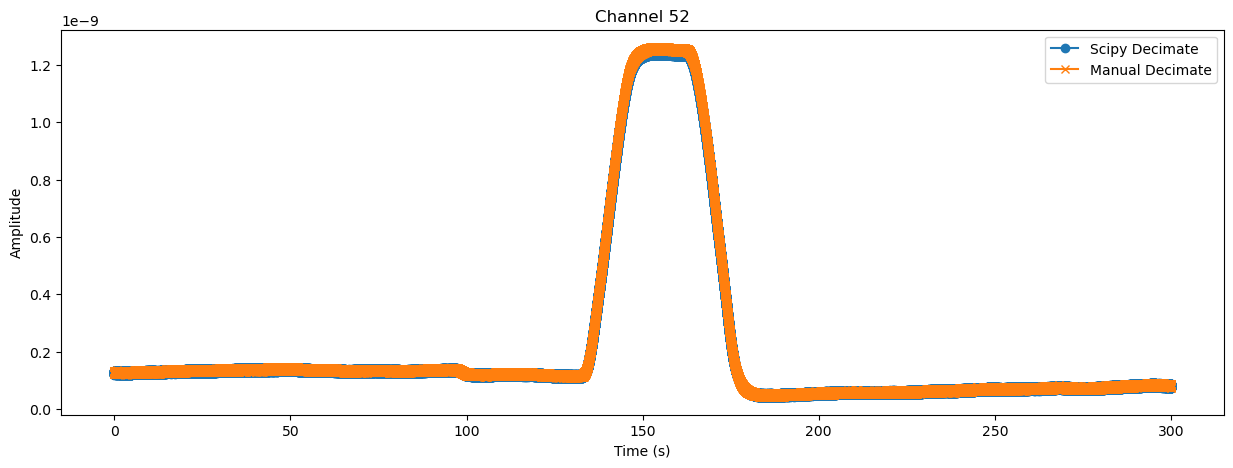

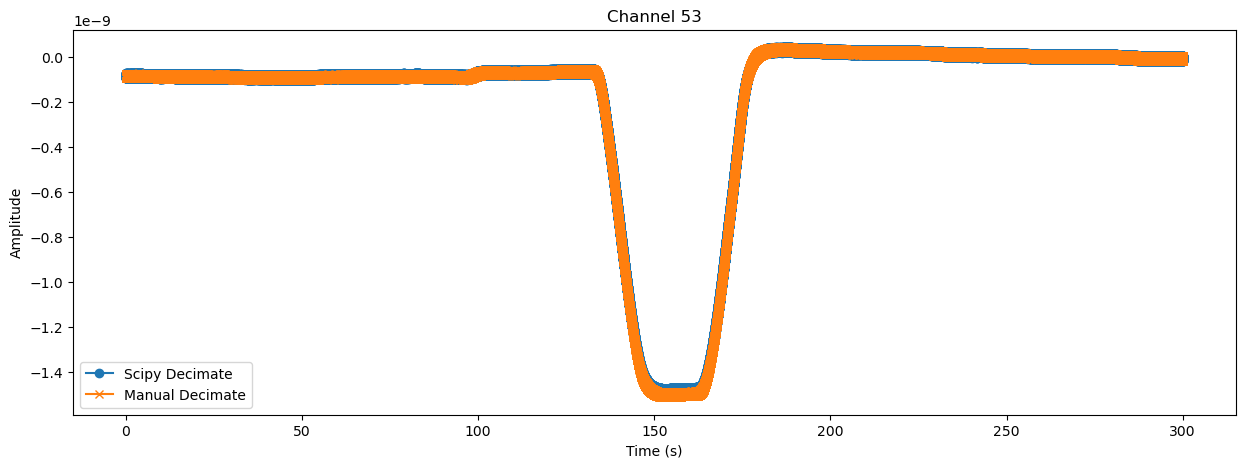

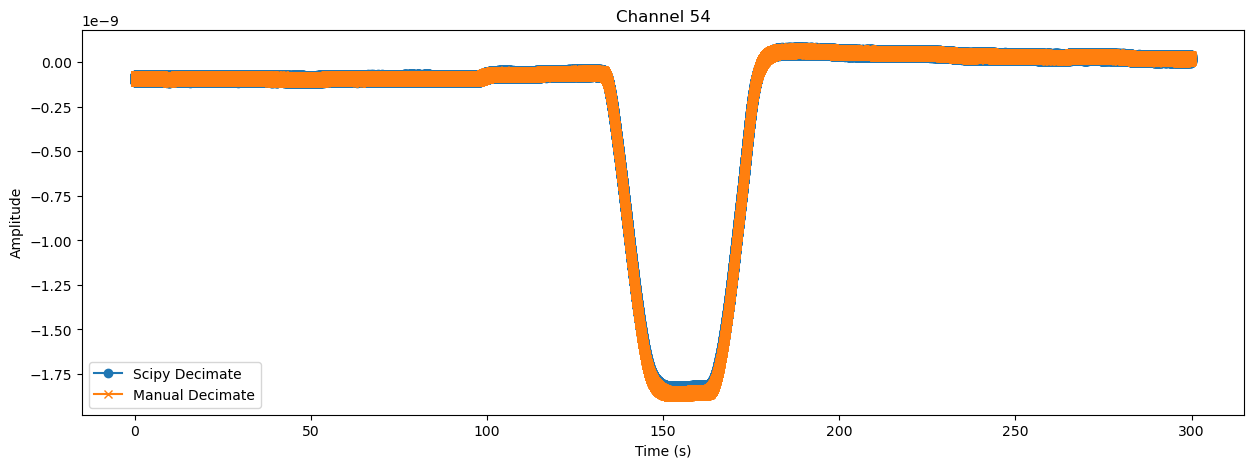

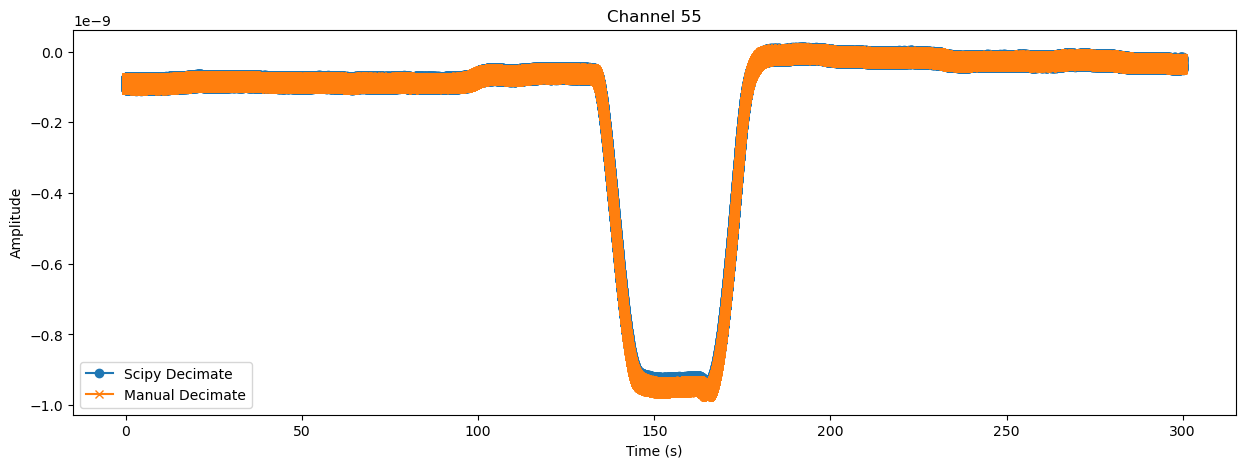

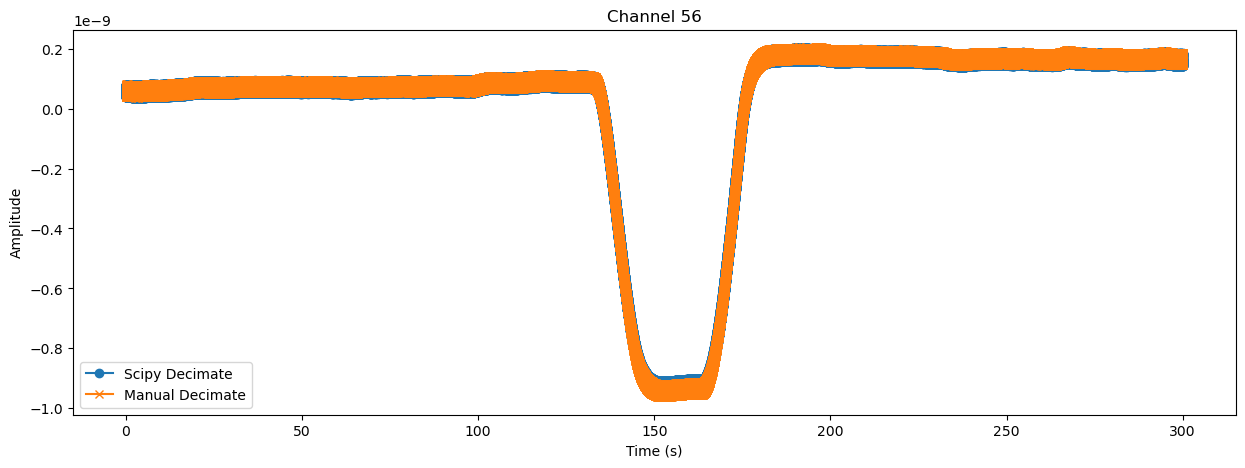

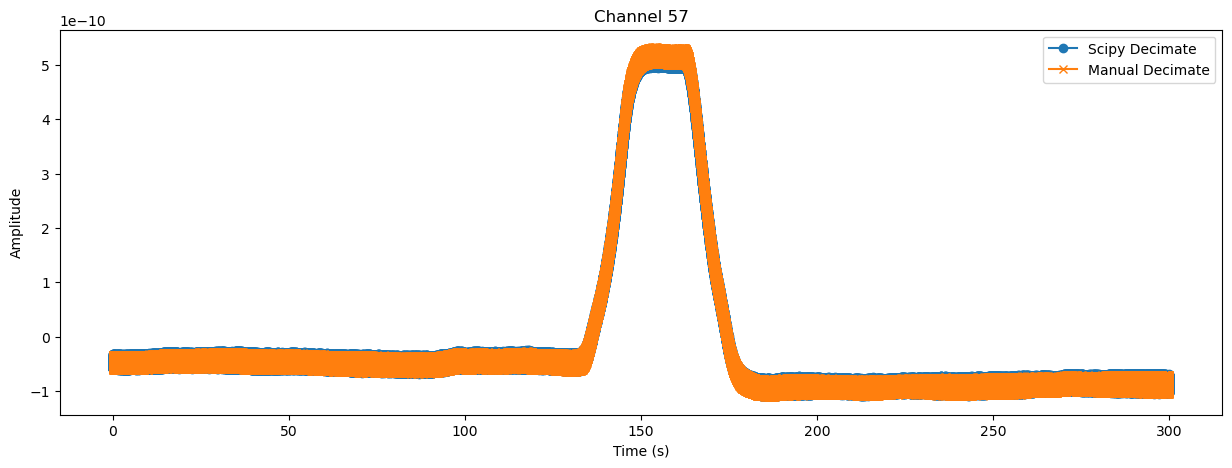

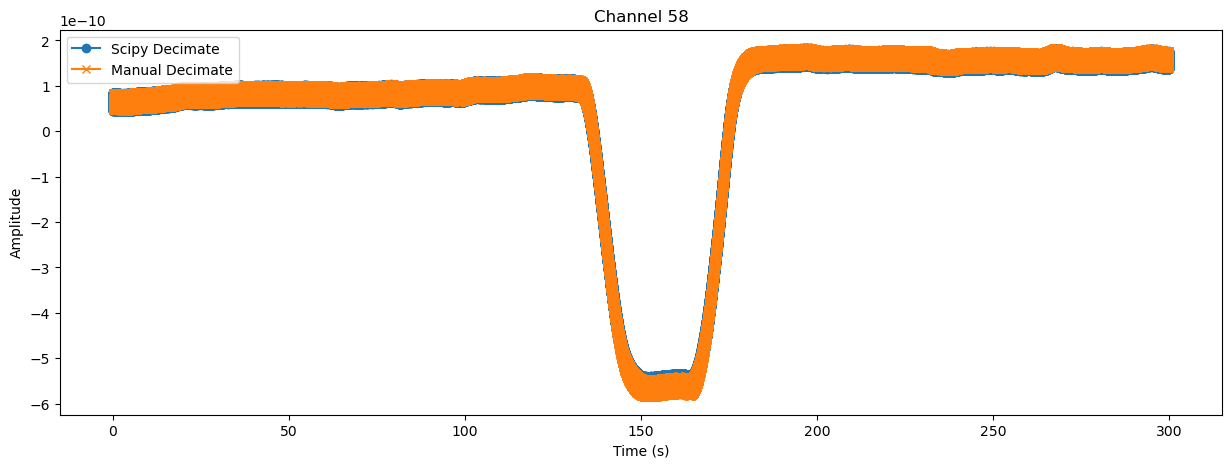

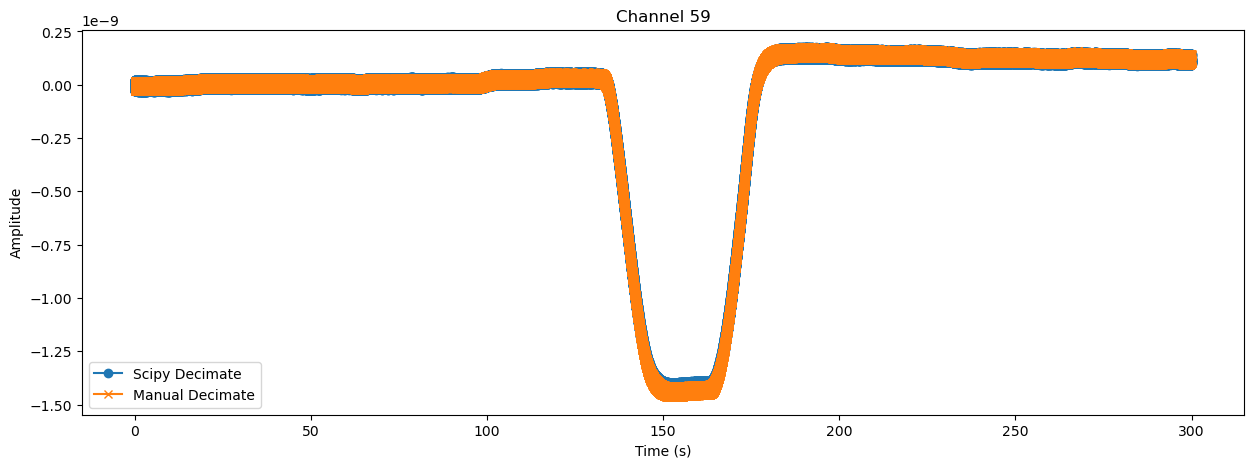

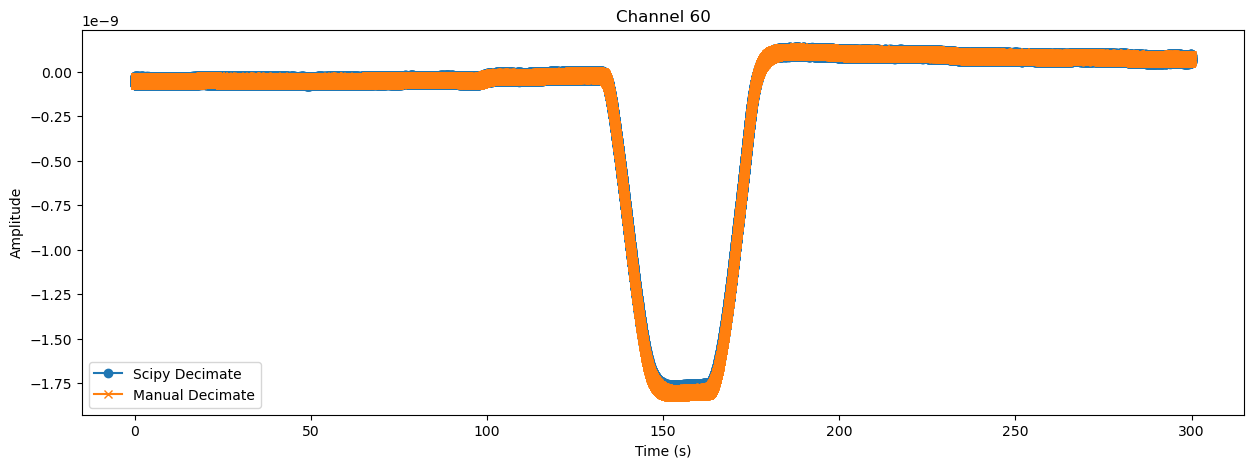

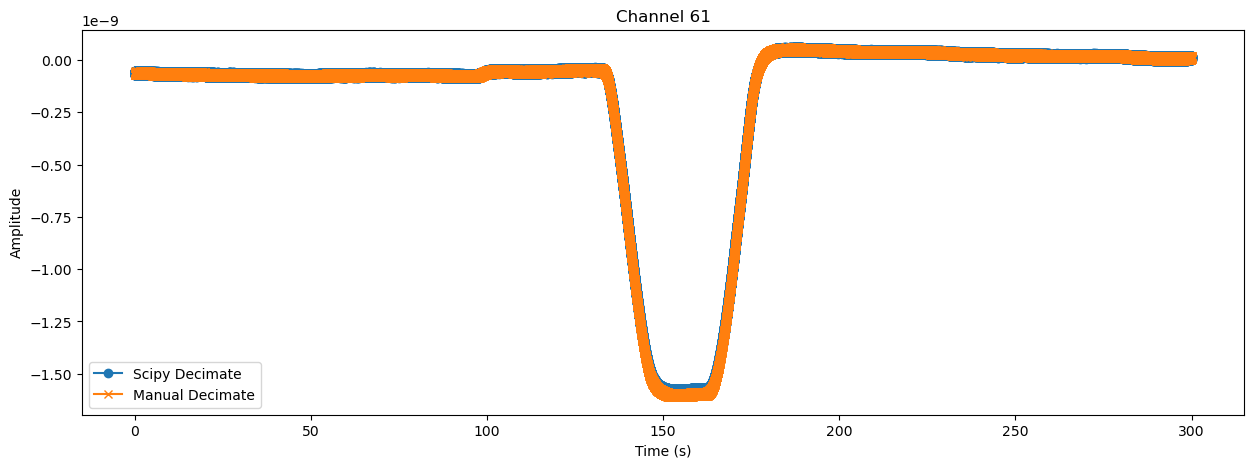

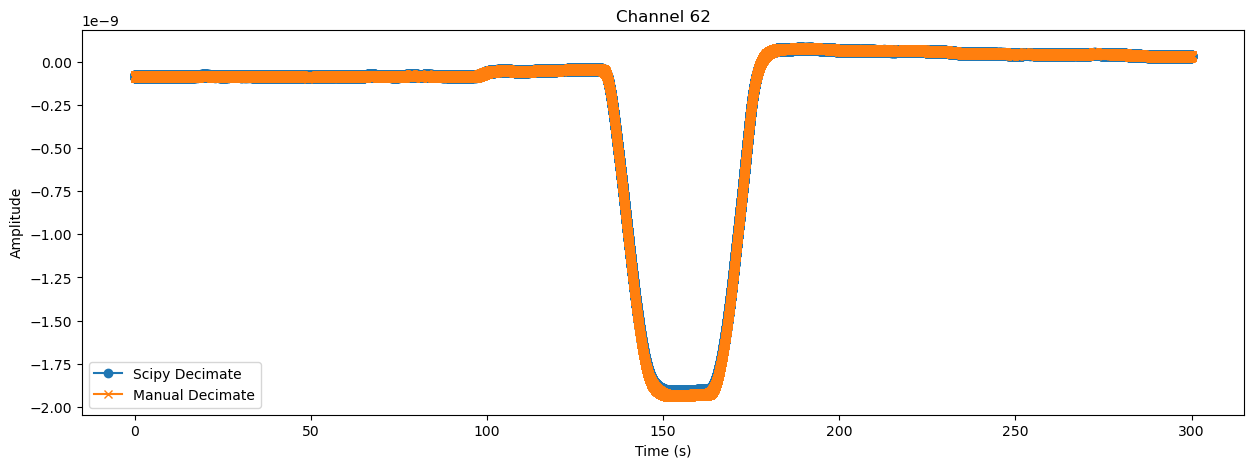

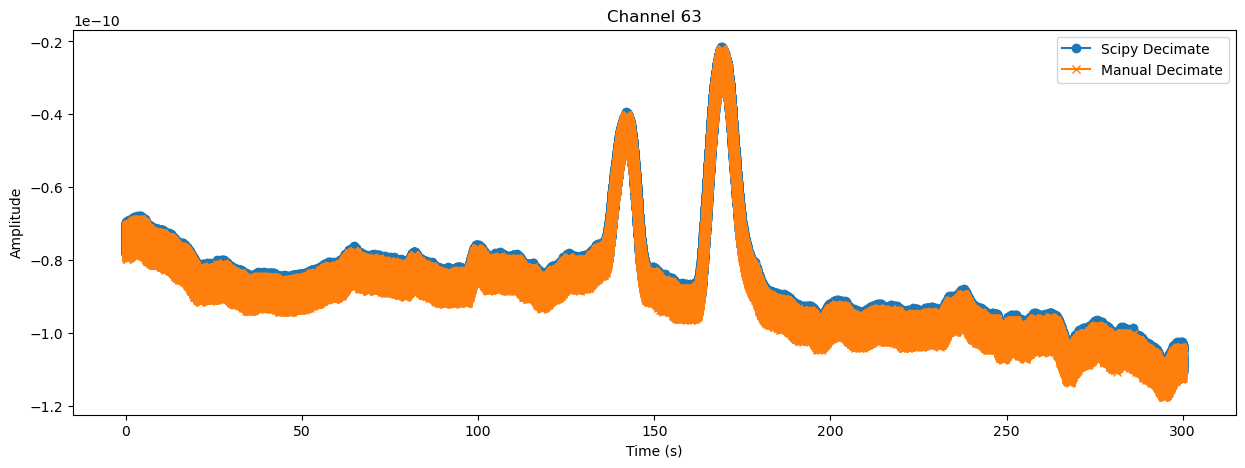

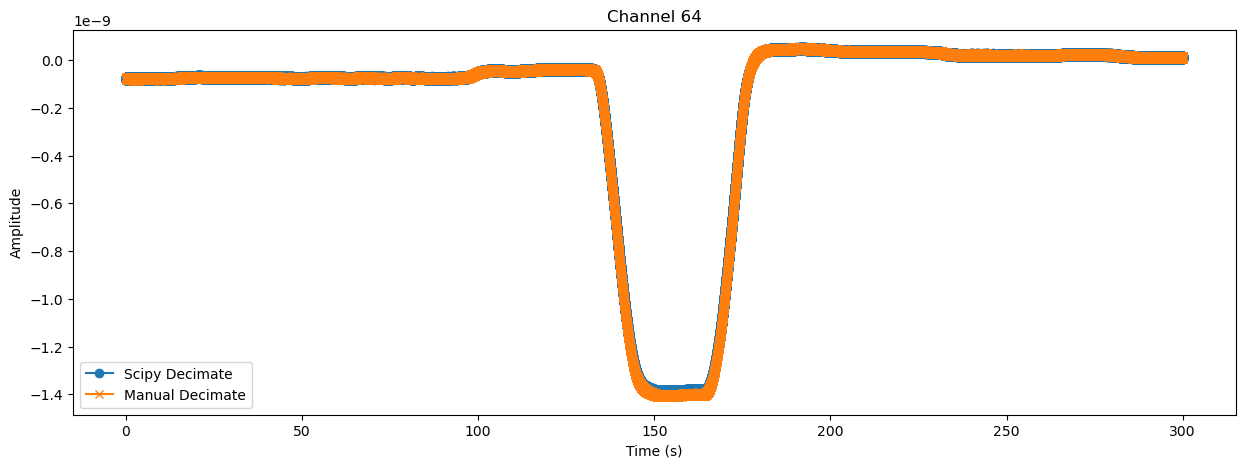

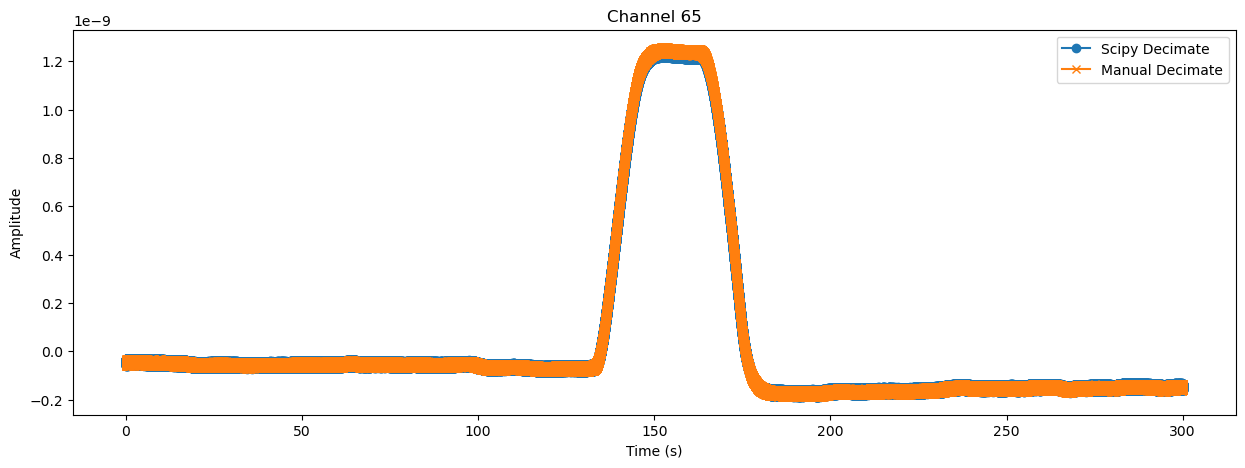

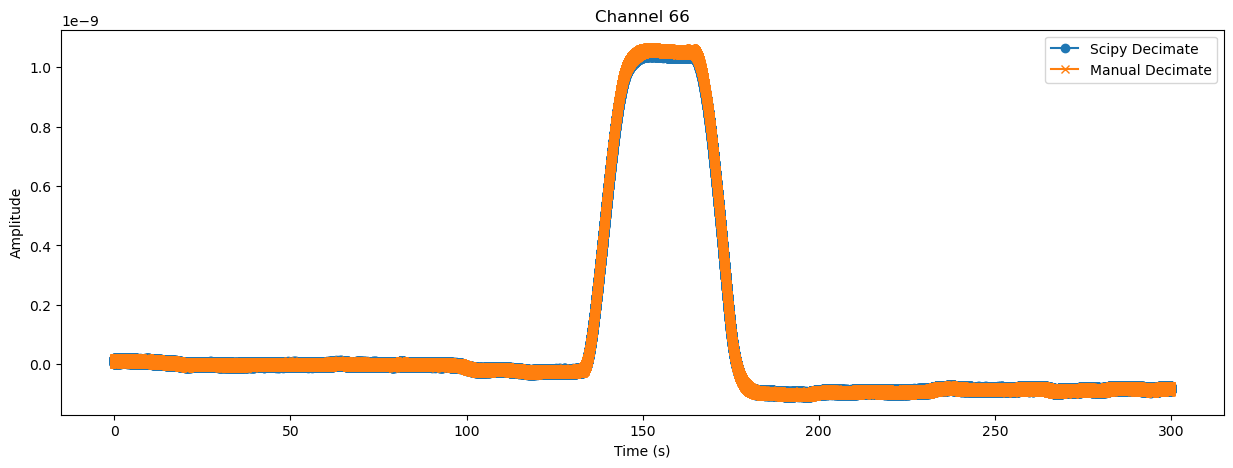

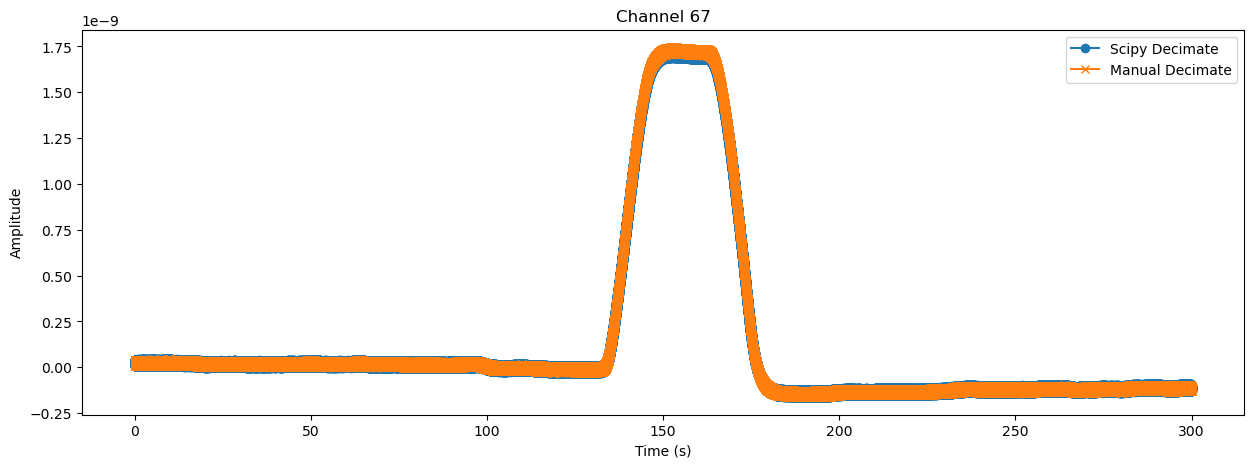

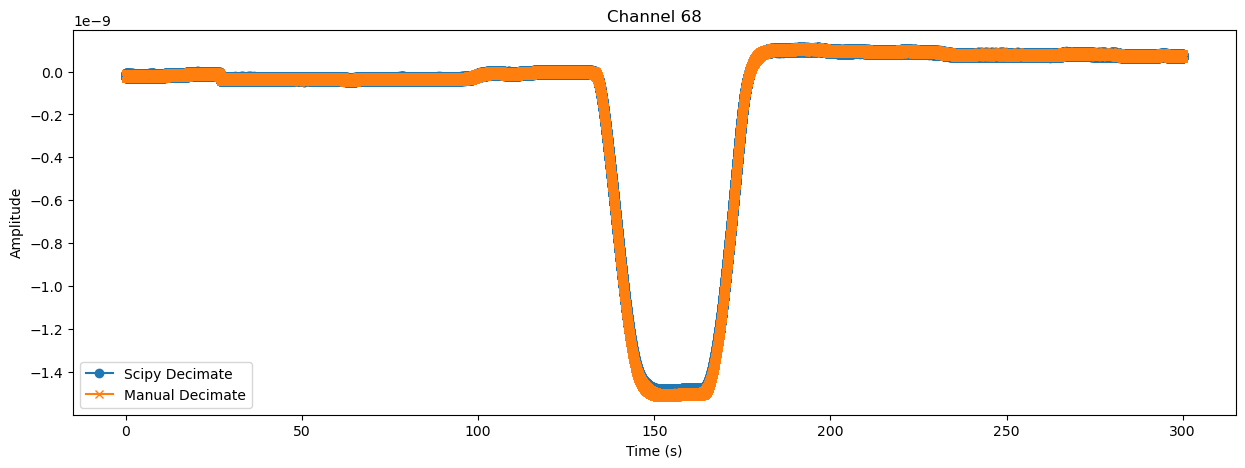

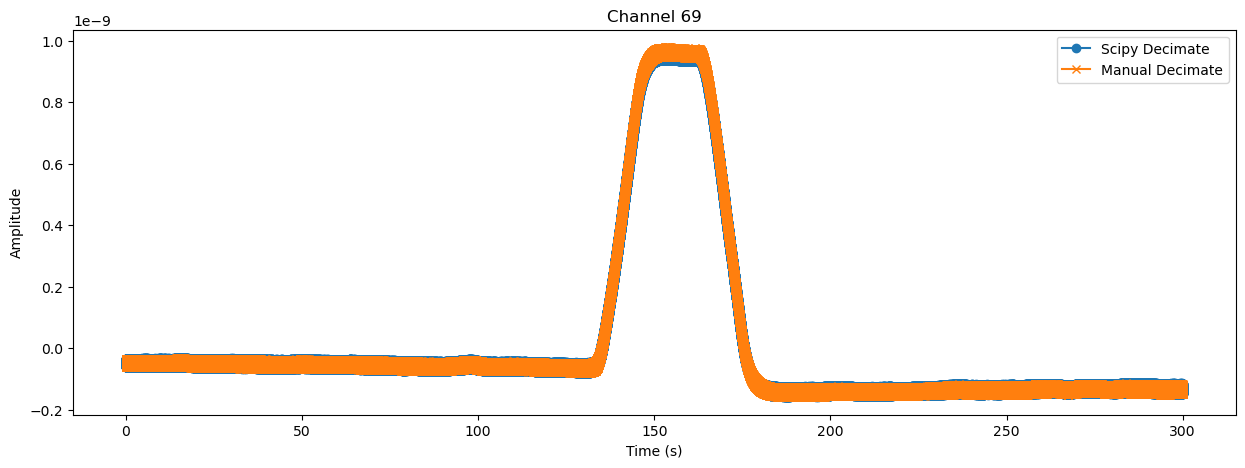

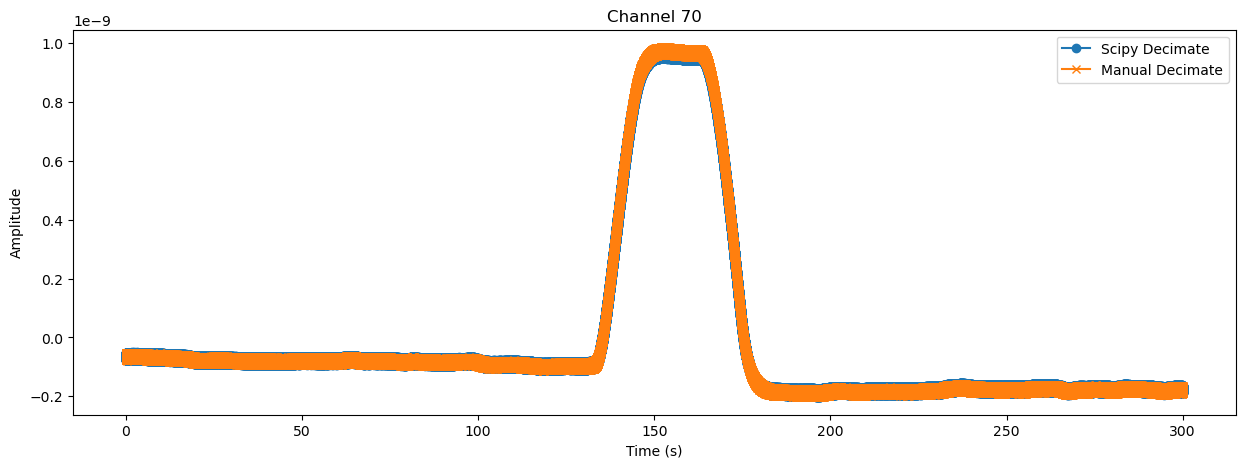

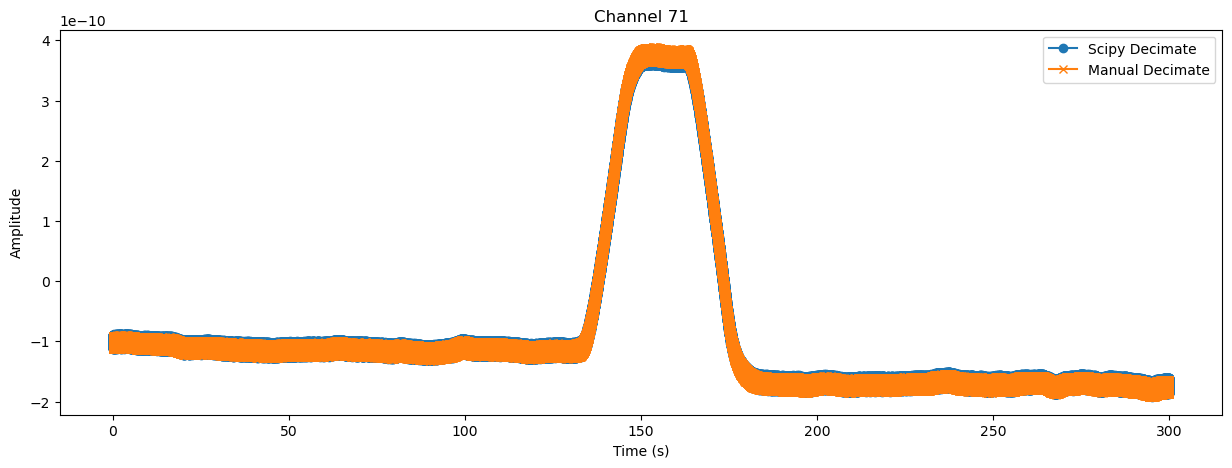

In [38]:
    # Plot original and decimated signals for checking
    for i, channel_data in enumerate(data):
        plt.figure(figsize=(15, 5))
        plt.plot(t_new, decimated_data[i-1], 'o-', label='Scipy Decimate')
        plt.plot(t_manual_decimation, decimated_data_new[i-1], 'x-', label='Manual Decimate')
        plt.title(f'Channel {i + 1}')
        plt.legend(loc='best')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()
    

In [ ]:
data_f.shape[1]

In [ ]:
(data_f.shape[0])

In [ ]:
# Return Data
raw_decimated = mne.io.RawArray(decimated_data)

In [ ]:
len(ydem)

In [ ]:
len(manual_decimation)

In [ ]:
data.shape

In [ ]:
events = mne.find_events(raw_filtered)

In [ ]:
epochs = mne.Epochs(raw_filtered, events, decim=decim)

print('desired sampling frequency was {} Hz; decim factor of {} yielded an '
      'actual sampling frequency of {} Hz.'
      .format(desired_sfreq, decim, epochs.info['sfreq']))


In [ ]:
events

# Sensor Noise Estimation

In [ ]:
import mne
import numpy as np
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

In [ ]:
data_path = '/home/rakshita/sub-Emptyroom/Emptyroom06082024.fif'
raw = mne.io.read_raw_fif(data_path, preload=True)

In [ ]:
# Compute Power Spectral Density (PSD)
n_fft = 10000
raw_PSD = raw.compute_psd(method="welch", fmin=1, fmax=120, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))
psds = raw_PSD.get_data()  # PSD values
freqs = raw_PSD.freqs 

In [ ]:
# Initialize a list to hold the average PSD values for each channel
avg_psd_all = []
avg_psd_60_80 = []
power_50hz = []

# Iterate over each channel to compute the required metrics
for psd in psds:
    avg_psd_all.append(np.mean(psd))
    avg_psd_60_80.append(np.mean(psd[(freqs >= 60) & (freqs <= 80)]))
    power_50hz.append(psd[np.argmin(np.abs(freqs - 50))])

### Plot Channel PSD

In [ ]:
# PSD based ranking and plot of channels 

fmin = 0.1  # minimum frequency in Hz
fmax = 100  # maximum frequency in Hz

# Compute the PSD for all channels
psds = raw.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))

# Extract power and frequencies
psd_values = psds.get_data()  
freqs = psds.freqs  


psd_values = np.array(psd_values)  
freqs = np.array(freqs) 


average_power = np.mean(psd_values, axis=1)


channel_names = raw.info['ch_names']


channel_data = list(zip(channel_names, average_power, psd_values))
channel_data.sort(key=lambda x: x[1], reverse=True)

# Plot the PSD for each channel
for rank, (channel, avg_power, psd) in enumerate(channel_data, 1):
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd), label=f'Rank {rank}: {channel}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title(f'PSD - {channel} ')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import os

max_len = len(raw.ch_names)

if len(avg_psd_all) < max_len:
    avg_psd_all.extend([np.nan] * (max_len - len(avg_psd_all)))

if len(avg_psd_60_80) < max_len:
    avg_psd_60_80.extend([np.nan] * (max_len - len(avg_psd_60_80)))

if len(power_50hz) < max_len:
    power_50hz.extend([np.nan] * (max_len - len(power_50hz)))

# Prepare DataFrame
data_dict = {
    'Date': [datetime.now().strftime('%Y-%m-%d')] * max_len,
    'File Name': [os.path.basename('Emptyroom06082024.fif')] * max_len,
    'Channel': raw.ch_names,
    'Avg Power (0-120 Hz)': avg_psd_all,
    'Avg Power (60-80 Hz)': avg_psd_60_80,
    'Power at 50 Hz': power_50hz
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)


In [ ]:
#df = df.sort_values(by='Channel', key=lambda col: col.str.extract('(\d+)').fillna(col))

# Load existing CSV if exists
csv_filename = 'psd_data.csv'
if os.path.exists(csv_filename):
    existing_df = pd.read_csv(csv_filename)
    date_entry_exists = existing_df['Date'].isin(df['Date'])
    if date_entry_exists.any():
        overwrite = input(f"Entry for {datetime.now().strftime('%Y-%m-%d')} already exists. Overwrite? (yes/no): ")
        if overwrite.lower() == 'yes':
            existing_df = existing_df[~date_entry_exists]
        else:
            df = pd.concat([existing_df, df], ignore_index=True)
    else:
        df = pd.concat([existing_df, df], ignore_index=True)

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")

In [ ]:
plt.plot(freqs, psds[1])

In [ ]:
len(power_50hz)

In [ ]:
df.head()

In [ ]:
## Blind Source Separation
from mne.preprocessing import ICA

# Set up parameters
n_components = 5  # Number of ICA components
random_state = 95  
method = 'fastica'  

ica = ICA(n_components=n_components, method=method, random_state=random_state)
ica.fit(raw)


ica.plot_components()

for ch_idx, ch_name in enumerate(raw.ch_names):
    print(f"Plotting for channel {ch_name} ({ch_idx + 1}/{len(raw.ch_names)})")
    ica.plot_overlay(raw.copy().pick_channels([ch_name]), title=f'Channel {ch_name}', show=True)

for component in range(n_components):
    plt.figure()
    plt.plot(ica.get_sources(raw).get_data()[component], label=f'ICA Component {component + 1}')
    plt.title(f'ICA Component {component + 1} Time Series')
    plt.legend()
    plt.show()

print("ICA decomposition completed and visualized.")



In [ ]:
print(raw.get_channel_types())